# Review of Value at Risk estimation methods for NASDAQ Composite, Nikkei 225 & Shanghai Composite indexes
**Bartłomiej Jamiołkowski**
**06 01 2022**

# 1. Introduction

The aim of the project is to present the techniques of VaR determination and to compare their quality with the use of back tests. The calculations use return prices of 3 well-known global stock indices downloaded from the Yahoo Finance website. Four methods are tested: historical, weighted history, EWMA and GARCH with 95% and 99% confidence intervals. The project is implemented using the R language in Jupyter Notebook.

# 2. Data Analysis

## 2.1 Data and libaries

Import of libraries

In [9]:
options(warn=-1)
library(SciViews)
library(ggplot2)
library(dplyr)
library(gridExtra)
library(quantmod)
library(GGally)
library(GAS)
library(segMGarch)
library(kableExtra)
library(repr)

Data import

In [2]:
nasdaq_d <- read.csv("^NDQ.csv", header = TRUE)
nikkei_225_d <- read.csv("^NKX.csv", header = TRUE)
shanghai_d <- read.csv("^SHC.csv", header = TRUE)

Choice of closing prices of stock indices

In [3]:
nasdaq_d_close <- nasdaq_d$Close
nikkei_225_d_close <- nikkei_225_d$Close
shanghai_d_close <- shanghai_d$Close

Description of selected variables:

* nasdaq_d_close - The closing price of the Nasdaq Composite index, which is a large index weighted by market capitalization. The index includes over 3,000 US stocks, depository receipts and mutual funds. The index is calculated all day and reported at 4:16 PM;

* nikkei_225_d_close - the closing price of the Nikkei 225 index, a price weighted index on the Tokyo Stock Exchange. Nikkei measures the performance of 225 major Japanese publicly traded companies spanning multiple industrial sectors;

* shanghai_d_close - the closing price of the Shanghai Composite index, which is a weighted stock index with market capitalization. It consists of A and B shares and includes companies listed on the Shaghai Stock Exchange.

## 2.2 Nasdaq Composite Close Price Analysis and Return

### 2.2.1 Plot

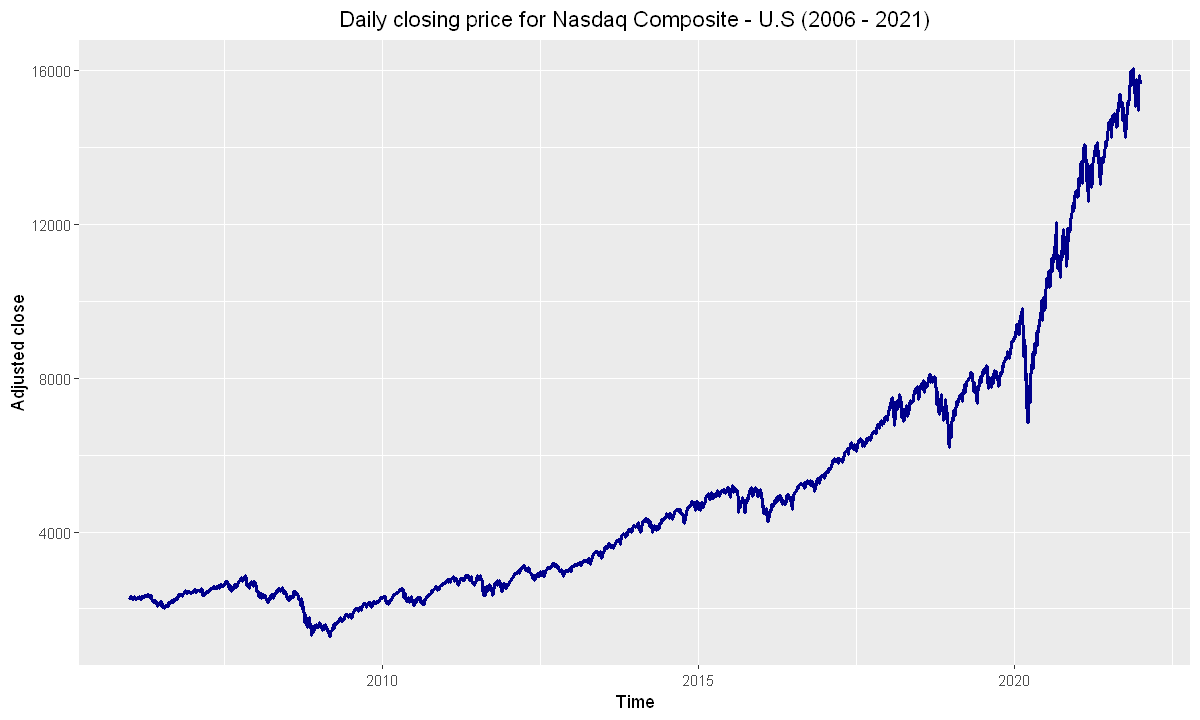

In [4]:
options(repr.plot.width=10, repr.plot.height=6)
ggplot(data = nasdaq_d, aes(x = as.Date(Date), y = Close)) + 
  geom_line(color = "darkblue", size = 1) +
  ggtitle("Daily closing price for Nasdaq Composite - U.S (2006 - 2021)") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Time", y = "Adjusted close")

The presented time series presents the longest boom in history on the American stock exchange from 2009 to 2019. The index quotes from 2019 and 2020 are the results of the coronavirus waves.

### 2.2.2 Basic Statistics

In [5]:
summary(nasdaq_d_close)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1269    2480    4063    5056    6870   16057 

Analyzing the results, it can be seen that the lowest index value in the period under consideration is $ 1269. Average value is $ 5056 and the maximum index value is $ 16057.

### 2.2.3 Rates of return

In [6]:
rate_of_return_nasdaq <- rep(0, 4028)
for(i in 1:4028){
  rate_of_return_nasdaq[i] = 100 * log(nasdaq_d_close[i + 1]/nasdaq_d_close[i])
}

Visualizations of rates of return are part of the stationarity study of time series due to the fact that non-stationary processes with changing: means, variances and covariances lead to unreliable forecasts.

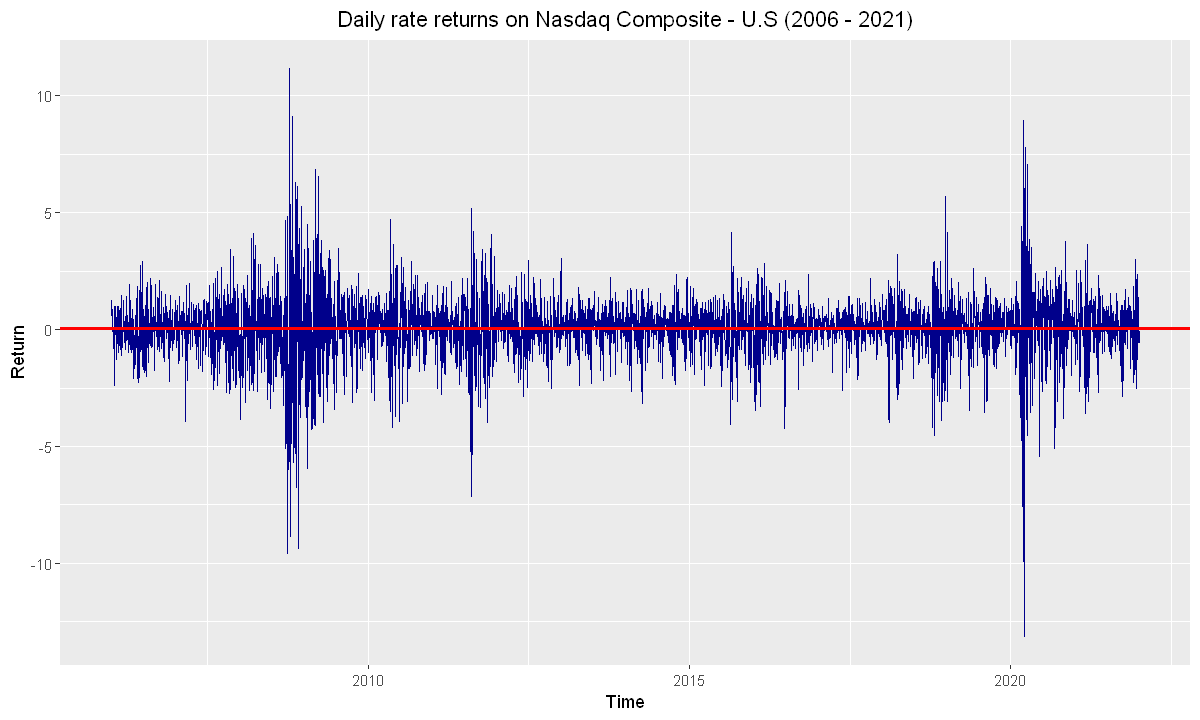

In [7]:
df1 <- data.frame(
  day = as.Date(nasdaq_d$Date[-1]),
  rate = rate_of_return_nasdaq
)
ggplot(data = df1, aes(x = day, y = rate)) + 
  geom_line(color = "darkblue", size = 0.3) +
  geom_hline(yintercept = mean(rate_of_return_nasdaq) , color = 'red' , size = 1) +
  ggtitle("Daily rate returns on Nasdaq Composite - U.S (2006 - 2021)") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Time", y = "Return") 

In the project, the extended Dickey-Fuller test is used to test the stationarity of the returns, where the null hypothesis is the statement about the non-stationarity of the time series.

In [8]:
adf.test(rate_of_return_nasdaq)

ERROR: Error in adf.test(rate_of_return_nasdaq): nie udało się znaleźć funkcji 'adf.test'


The p-value is lower than the significance level of 0.05, which means rejecting the null hypothesis and accepting the real alternative hypothesis about the stationarity of the time series.

## 2.3 Analysis of the closing prices and the rate of return of the Nikkei 225 index

### 2.3.1 Plot

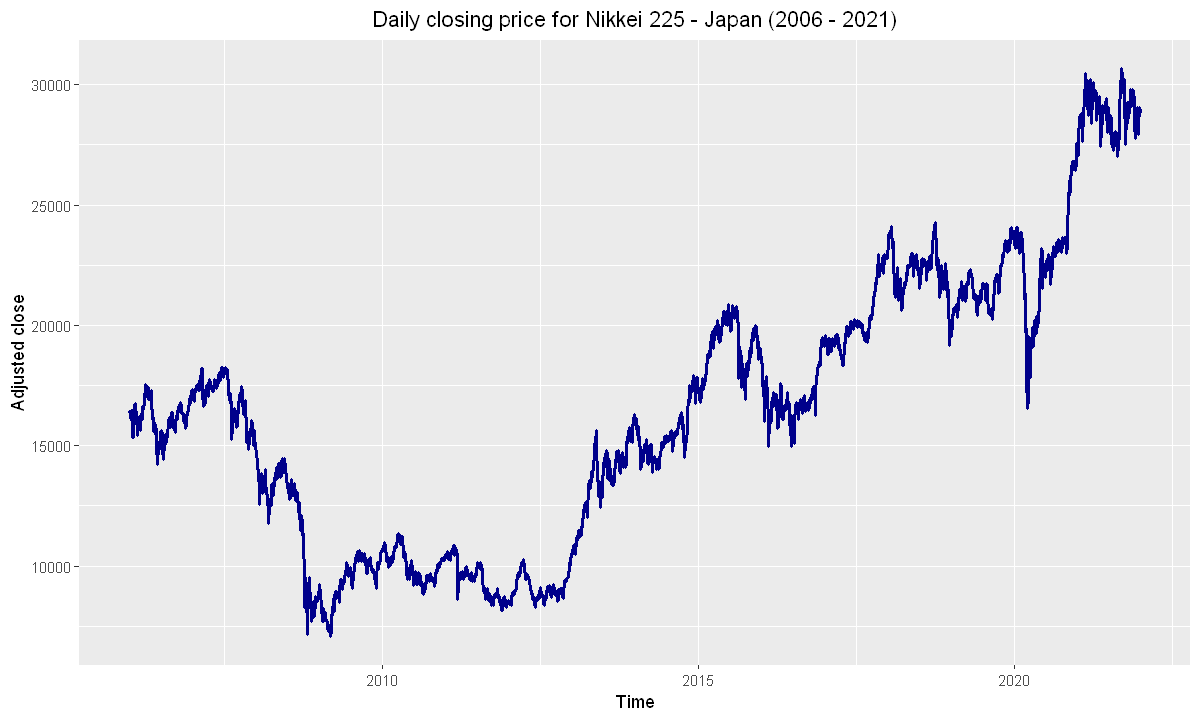

In [10]:
ggplot(data = nikkei_225_d, aes(x = as.Date(Date), y = Close)) + 
  geom_line(color = "darkblue", size = 1) +
  ggtitle("Daily closing price for Nikkei 225 - Japan (2006 - 2021)") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Time", y = "Adjusted close") 

The time series shows the low quotations of the index in 2011-2012, which were caused by the great earthquake and tsunami in Japan. Since 2012, a gradual depreciation of the yen continued as a result of the monetary easing program. The last significant event is the index plunge in 2020 as a consequence of the development of the coronovirus epidemic and investor uncertainty.

### 2.3.2 Basic Statistics

In [11]:
summary(nikkei_225_d_close)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7055   10612   16386   16494   20555   30670 

Analizujac wyniki można zauważyć, że najniższa wartość indeksu w rozważanym okresie wynosi 7055 $ . Średnia wartość to 16494 $, a maksymalna wartość indeksu wynosi 30670 $.

### 2.3.3 Rates of return

In [12]:
rate_of_return_nikkei_225 <- rep(0, 3917)
for(i in 1:3917){
  rate_of_return_nikkei_225[i] = 100 * log(nikkei_225_d_close[i + 1]/nikkei_225_d_close[i])
}

Visualizations of rates of return are part of the stationarity study of time series due to the fact that non-stationary processes with changing: means, variances and covariances lead to unreliable forecasts.

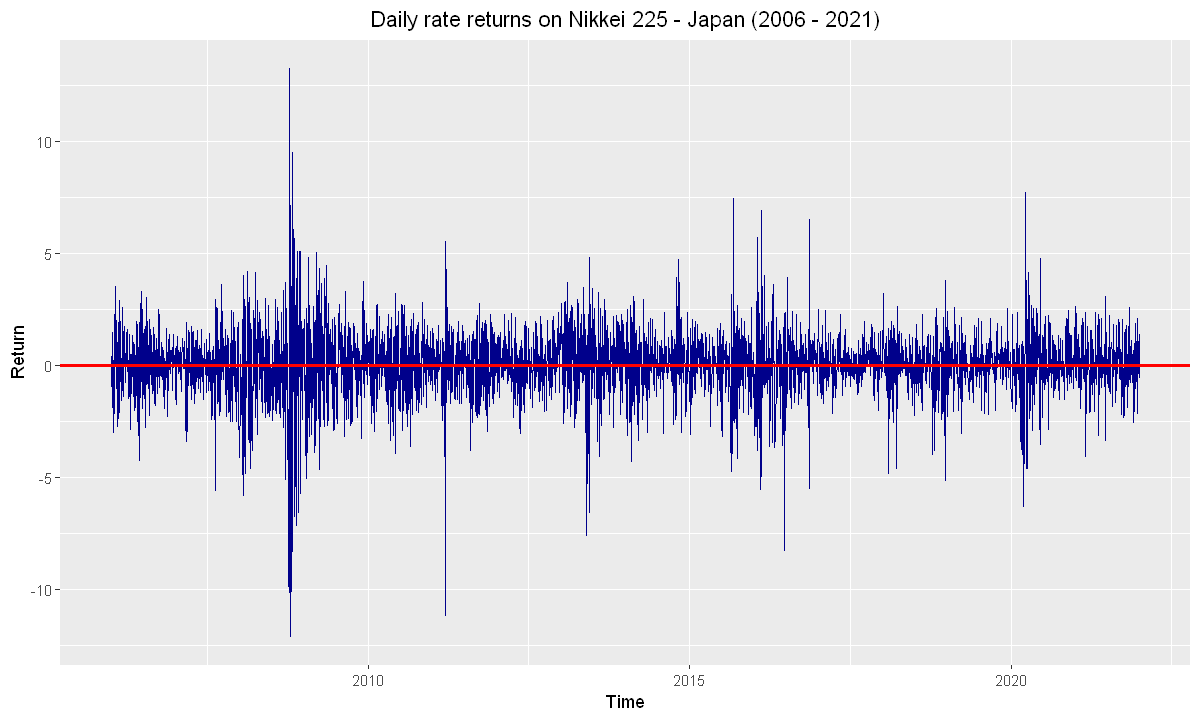

In [13]:
df2 <- data.frame(
  day = as.Date(nikkei_225_d$Date[-1]),
  rate = rate_of_return_nikkei_225
)
ggplot(data = df2, aes(x = day, y = rate)) + 
  geom_line(color = "darkblue", size = 0.3) +
  geom_hline(yintercept = mean(rate_of_return_nikkei_225) , color = 'red' , size = 1) +
  ggtitle("Daily rate returns on Nikkei 225 - Japan (2006 - 2021)") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Time", y = "Return") 

In the project, the extended Dickey-Fuller test is used to test the stationarity of the returns, where the null hypothesis is the statement about the non-stationarity of the time series.

In [14]:
adf.test(rate_of_return_nikkei_225)

ERROR: Error in adf.test(rate_of_return_nikkei_225): nie udało się znaleźć funkcji 'adf.test'


The p-value is lower than the significance level of 0.05, which means rejecting the null hypothesis and accepting the real alternative hypothesis about the stationarity of the time series.

## 2.4 Close Price Analysis and Shanghai Composite Index Return

### 2.4.1 Plot

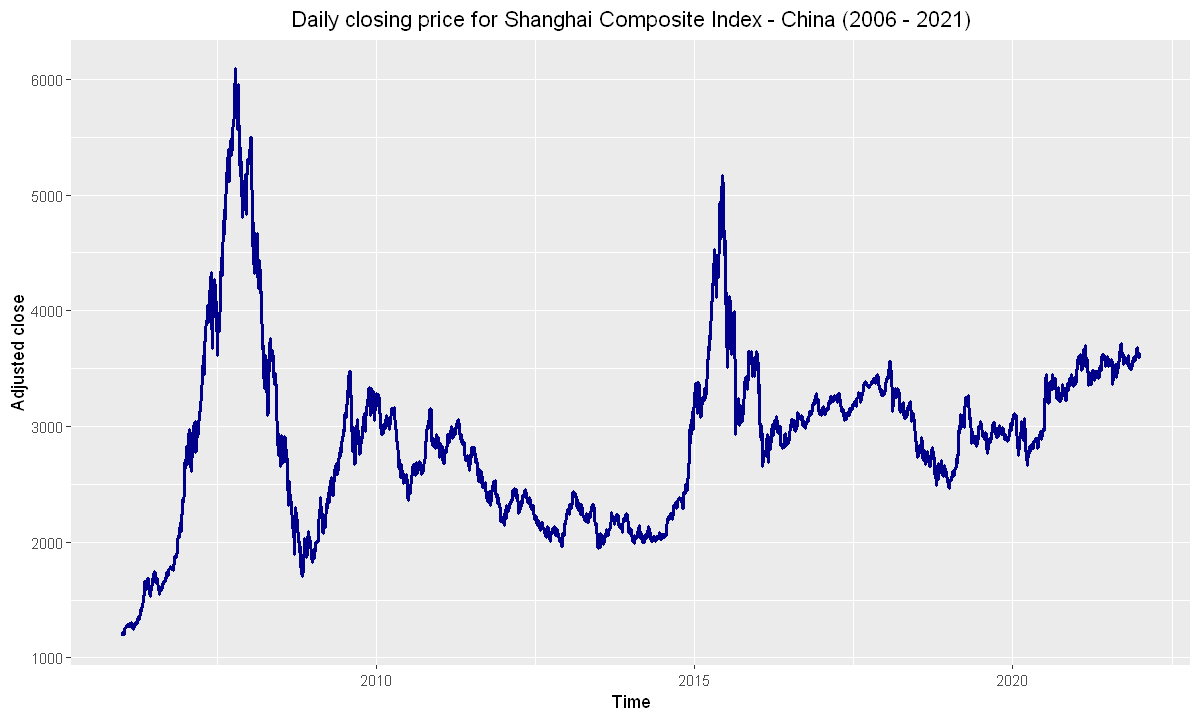

In [15]:
ggplot(data = shanghai_d, aes(x = as.Date(Date), y = Close)) + 
  geom_line(color = "darkblue", size = 1) +
  ggtitle("Daily closing price for Shanghai Composite Index - China (2006 - 2021)") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Time", y = "Adjusted close") 

Two interesting events can be observed in the time series, namely the Chinese stock market bubble of 2007 and the bubble of 2015 known in the public opinion as turbulence on Chinese stock exchanges 2015-2016. The first stock market decline was a result of information about the Chinese government's plans to raise interest rates in order to curb inflation. The bursting of the second bubble was the result of investors' fear of the instability of the Chinese stock exchange full of people investing with borrowed funds.

### 2.4.2 Basic Statistics

In [16]:
summary(shanghai_d_close)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1181    2341    2910    2896    3279    6092 

Analyzing the results, it can be noticed that the lowest index value in the period under consideration is $ 1,181. Average value is $ 2,896 and the maximum index value is $ 6,092.

### 2.4.3 Rates of return

In [17]:
rate_of_return_shanghai <- rep(0, 3888)
for(i in 1:3888){
  rate_of_return_shanghai[i] = 100 * log(shanghai_d_close[i + 1]/shanghai_d_close[i])
}

Visualizations of rates of return are part of the stationarity study of time series due to the fact that non-stationary processes with changing: means, variances and covariances lead to unreliable forecasts.

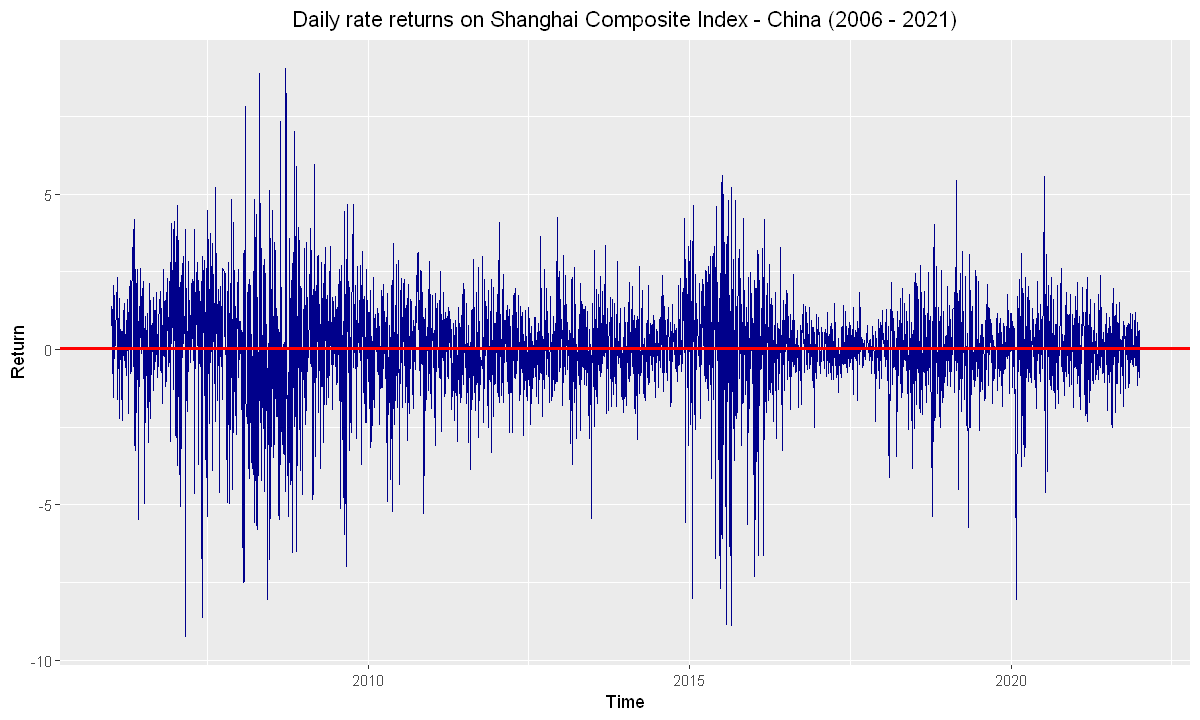

In [18]:
df3 <- data.frame(
  day = as.Date(shanghai_d$Date[-1]),
  rate = rate_of_return_shanghai
)
ggplot(data = df3, aes(x = day, y = rate)) + 
  geom_line(color = "darkblue", size = 0.3) +
  geom_hline(yintercept = mean(rate_of_return_shanghai) , color = 'red' , size = 1) +
  ggtitle("Daily rate returns on Shanghai Composite Index - China (2006 - 2021)") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Time", y = "Return") 

In the project, the extended Dickey-Fuller test is used to test the stationarity of the returns, where the null hypothesis is the statement about the non-stationarity of the time series.

In [19]:
adf.test(rate_of_return_shanghai)

ERROR: Error in adf.test(rate_of_return_shanghai): nie udało się znaleźć funkcji 'adf.test'


The p-value is lower than the significance level of 0.05, which means rejecting the null hypothesis and accepting the real alternative hypothesis about the stationarity of the time series.

# 2. Techniques for calculating VaR and ES

## 2.1. Historical simulation method

### 2.1.1 95% confidence interval

In [20]:
historical <- function(x, a){
  historical_var <-c()
  historical_es <- c()
  for(i in 0:(length(x) - 250)){ 
    window_var <- c()
    window_es <- c()
    for(j in 1:250){
      rate_1 <- x[i + j]
      window_var <- append(window_var, rate_1)
    }
    value_var <- quantile(window_var, a)
    for(j in 1:250){
      if(window_var[j] < value_var){
        window_es <- append(window_es, window_var[j])
      }
    }
    value_es <- mean(window_es)
    historical_var <- append(historical_var, value_var)
    historical_es <- append(historical_es, value_es)
  }
  return(list(h1 = historical_var, h2 = historical_es))
}

**Nasdaq Composite**

In [21]:
historical_list <- historical(rate_of_return_nasdaq, 0.05)
historical_95_nasdaq_var <- historical_list$h1
historical_95_nasdaq_es <- historical_list$h2

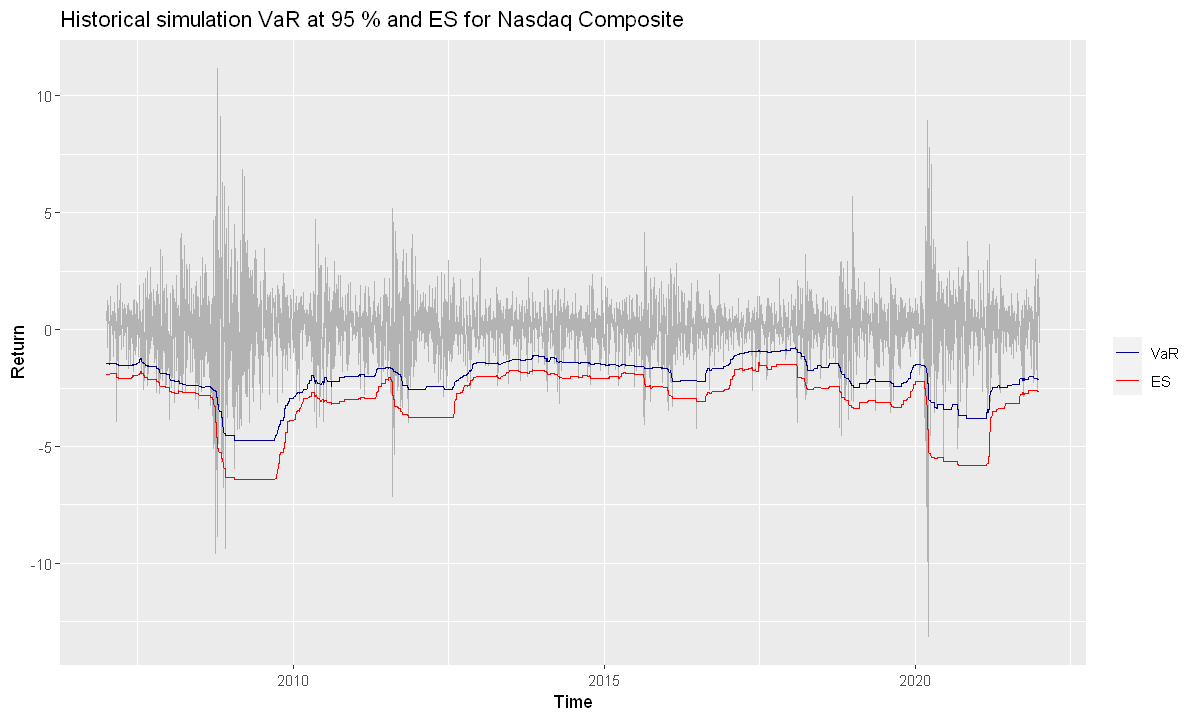

In [22]:
day = as.Date(nasdaq_d$Date[-1])

df4 <- data.frame(
  day = day[251:4029],
  rate = rate_of_return_nasdaq[251:4029],
  var = historical_95_nasdaq_var,
  es = historical_95_nasdaq_es
)

ggplot(data = df4, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.5) +
  geom_line(aes(x = df4$day, y = df4$var, color = 'darkblue'), size = 0.5) +
  geom_line(aes(x = df4$day, y = df4$es, color = 'red'), size = 0.5) +
  ggtitle("Historical simulation VaR at 95 % and ES for Nasdaq Composite") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

**Nikkei 225**

In [23]:
historical_list <- historical(rate_of_return_nikkei_225, 0.05)
historical_95_nikkei_225_var <- historical_list$h1
historical_95_nikkei_225_es <- historical_list$h2

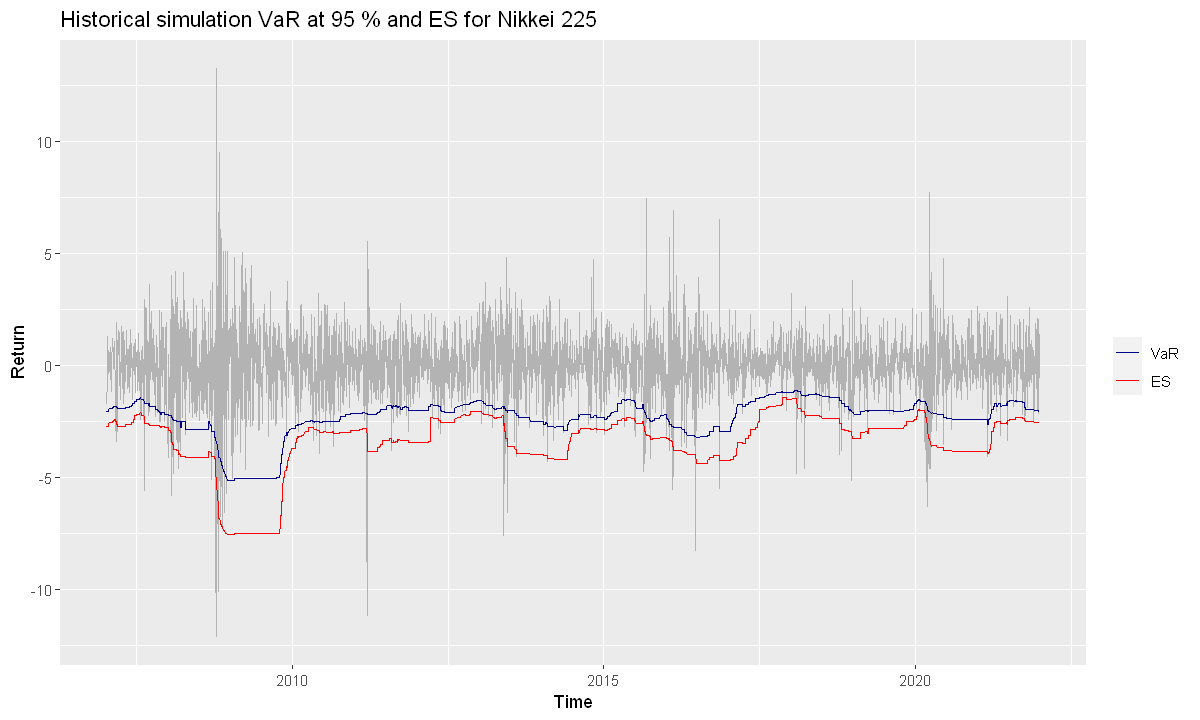

In [24]:
day = as.Date(nikkei_225_d$Date[-1])

df5 <- data.frame(
  day = day[251:3918],
  rate = rate_of_return_nikkei_225[251:3918],
  var = historical_95_nikkei_225_var,
  es = historical_95_nikkei_225_es
)

ggplot(data = df5, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.5) +
  geom_line(aes(x = df5$day, y = df5$var, color = 'darkblue'), size = 0.5) +
  geom_line(aes(x = df5$day, y = df5$es, color = 'red'), size = 0.5) +
  ggtitle("Historical simulation VaR at 95 % and ES for Nikkei 225") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

**Shanghai Composite**

In [25]:
historical_list <- historical(rate_of_return_shanghai, 0.05)
historical_95_shanghai_var <- historical_list$h1
historical_95_shanghai_es <- historical_list$h2

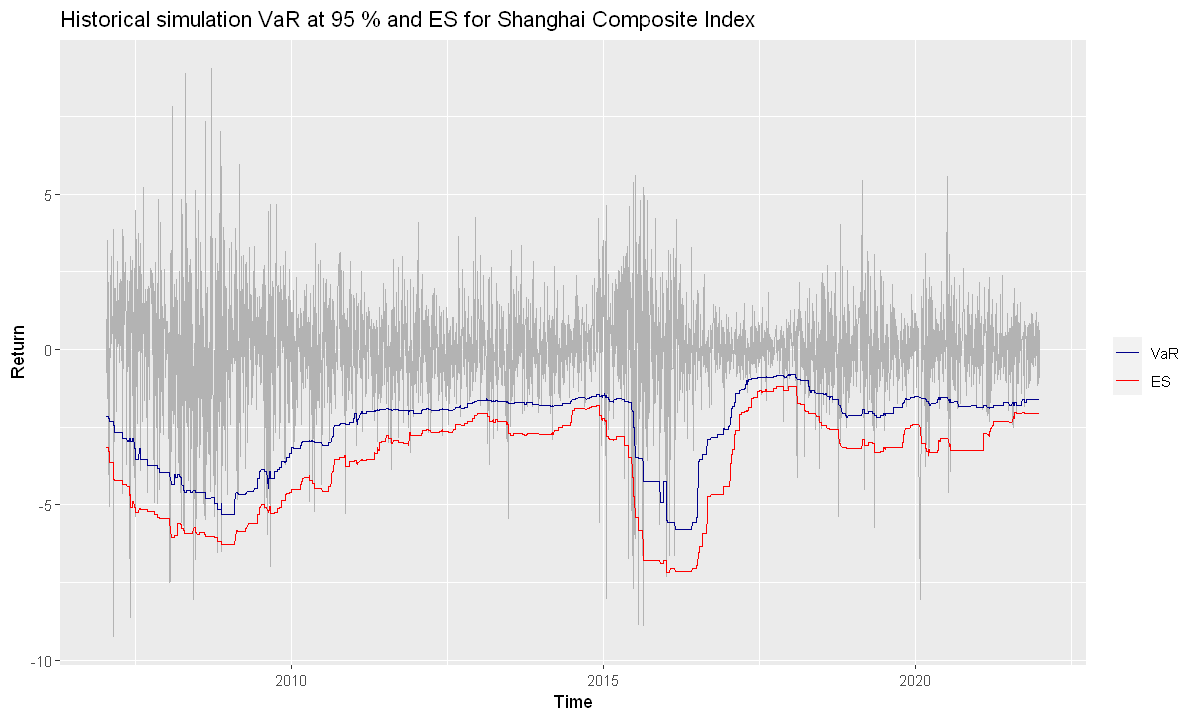

In [26]:
day = as.Date(shanghai_d$Date[-1])

df6 <- data.frame(
  day = day[251:3889],
  rate = rate_of_return_shanghai[251:3889],
  var = historical_95_shanghai_var,
  es = historical_95_shanghai_es
)

ggplot(data = df6, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.5) +
  geom_line(aes(x = df6$day, y = df6$var, color = 'darkblue'), size = 0.5) +
  geom_line(aes(x = df6$day, y = df6$es, color = 'red'), size = 0.5) +
  ggtitle("Historical simulation VaR at 95 % and ES for Shanghai Composite Index") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

### 2.1.1 99% confidence interval

**Nasdaq Composite**

In [27]:
historical_list <- historical(rate_of_return_nasdaq, 0.01)
historical_99_nasdaq_var <- historical_list$h1
historical_99_nasdaq_es <- historical_list$h2

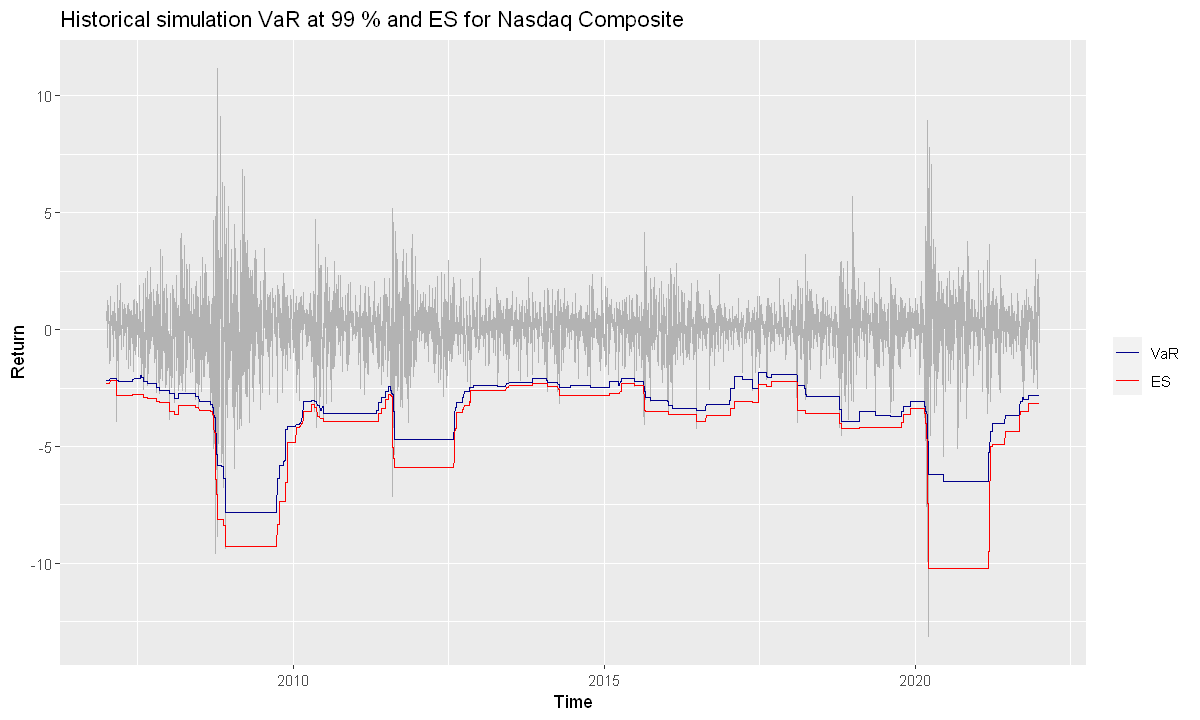

In [28]:
day = as.Date(nasdaq_d$Date[-1])

df7 <- data.frame(
  day = day[251:4029],
  rate = rate_of_return_nasdaq[251:4029],
  var = historical_99_nasdaq_var,
  es = historical_99_nasdaq_es
)

ggplot(data = df7, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.5) +
  geom_line(aes(x = df7$day, y = df7$var, color = 'darkblue'), size = 0.5) +
  geom_line(aes(x = df7$day, y = df7$es, color = 'red'), size = 0.5) +
  ggtitle("Historical simulation VaR at 99 % and ES for Nasdaq Composite") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

**Nikkei 225**

In [29]:
historical_list <- historical(rate_of_return_nikkei_225, 0.01)
historical_99_nikkei_225_var <- historical_list$h1
historical_99_nikkei_225_es <- historical_list$h2

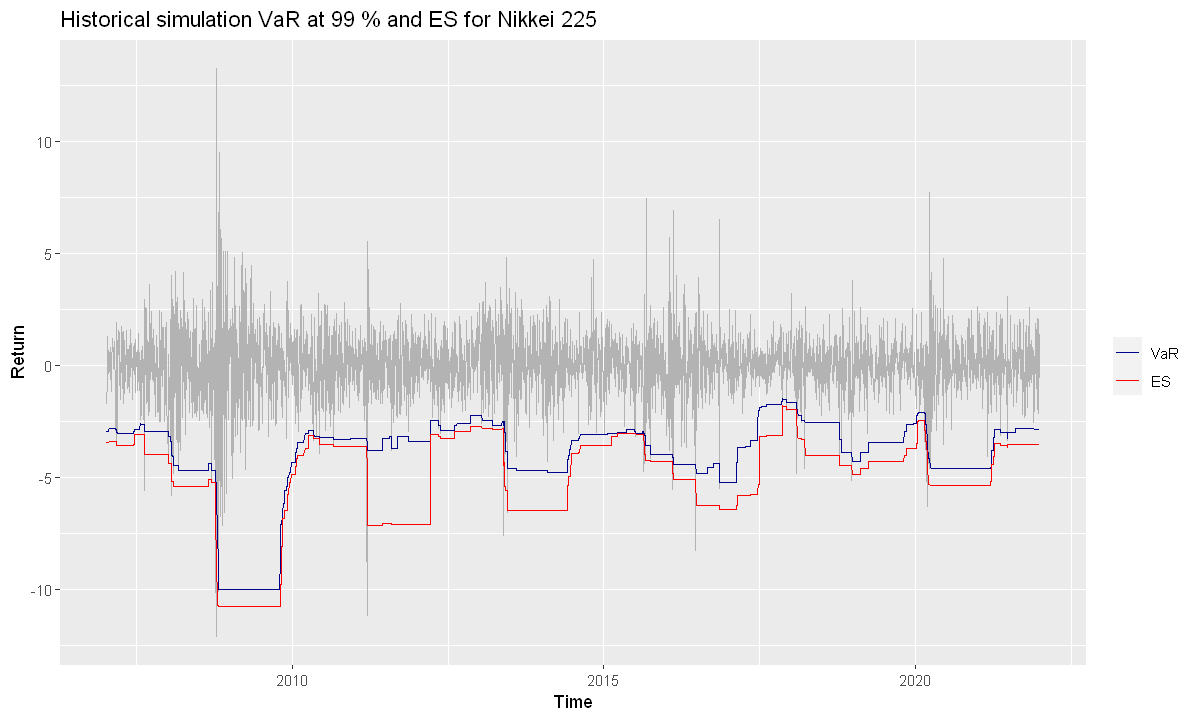

In [30]:
day = as.Date(nikkei_225_d$Date[-1])

df8 <- data.frame(
  day = day[251:3918],
  rate = rate_of_return_nikkei_225[251:3918],
  var = historical_99_nikkei_225_var,
  es = historical_99_nikkei_225_es
)

ggplot(data = df8, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.5) +
  geom_line(aes(x = df8$day, y = df8$var, color = 'darkblue'), size = 0.5) +
  geom_line(aes(x = df8$day, y = df8$es, color = 'red'), size = 0.5) +
  ggtitle("Historical simulation VaR at 99 % and ES for Nikkei 225") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

**Shanghai Composite**

In [31]:
historical_list <- historical(rate_of_return_shanghai, 0.01)
historical_99_shanghai_var <- historical_list$h1
historical_99_shanghai_es <- historical_list$h2

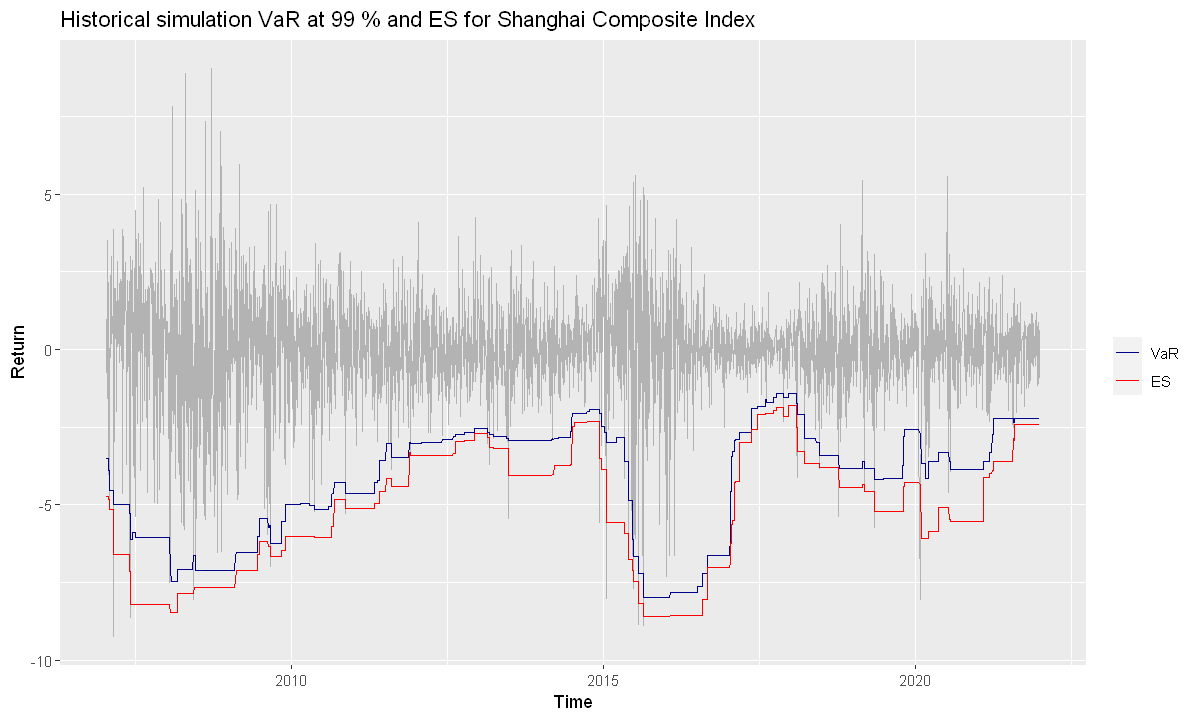

In [32]:
day = as.Date(shanghai_d$Date[-1])

df9 <- data.frame(
  day = day[251:3889],
  rate = rate_of_return_shanghai[251:3889],
  var = historical_99_shanghai_var,
  es = historical_99_shanghai_es
)

ggplot(data = df9, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.5) +
  geom_line(aes(x = df9$day, y = df9$var, color = 'darkblue'), size = 0.5) +
  geom_line(aes(x = df9$day, y = df9$es, color = 'red'), size = 0.5) +
  ggtitle("Historical simulation VaR at 99 % and ES for Shanghai Composite Index") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

## 2.2 Historical method with weights

### 2.2.1 95% confidence interval

In [33]:
weighted_historical <- function(x, a){
  x <- as.vector(x)
  w_historical_var <-c()
  w_historical_es <- c()
  for(i in 0:(length(x)- 250)){
    df <- data.frame(
      ret = rep(0.0, 250),
      w = rep(0.0, 250)
    )
    for(j in 1:250){
      lam <- 0.995
      wg <- lam^(250 - j) * (1 - lam) / (1 - lam^250)
      df$ret[j] = x[i + j]
      df$w[j] = wg
    }
    df <- df[order(df$ret, decreasing = FALSE),]
    df$cumw <- with(df, cumsum(w))
    value_var <- df[which.min(abs(df$cumw - a)),'ret']
    window_es <- c()
    for(j in 1:250){
      if(df$ret[j] < value_var){
        window_es <- append(window_es, df$ret[j])
      }
    }
    value_es <- mean(window_es)
    w_historical_var <- append(w_historical_var, value_var)
    w_historical_es <- append(w_historical_es, value_es)
  }
  return(list(h1 = w_historical_var, h2 = w_historical_es))
}

**Nasdaq Composite**

In [34]:
weighted_historical_list <- weighted_historical(rate_of_return_nasdaq, 0.05)
weighted_historical_95_nasdaq_var <- weighted_historical_list$h1
weighted_historical_95_nasdaq_es <- weighted_historical_list$h2

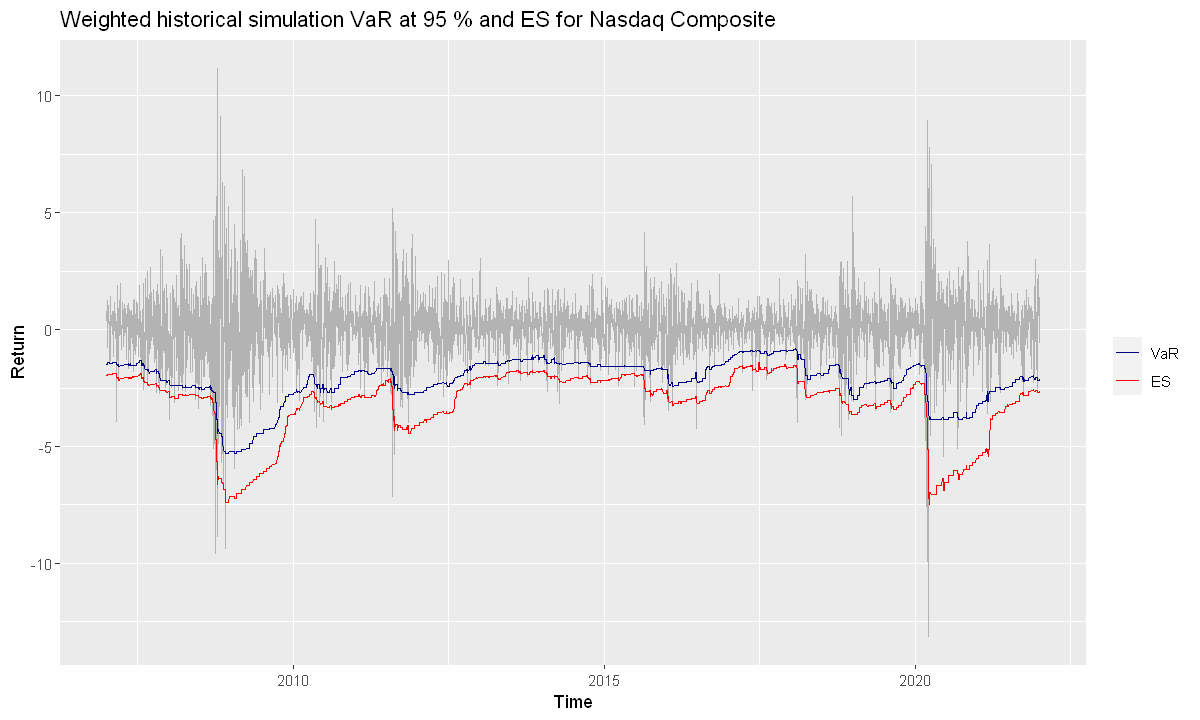

In [35]:
day = as.Date(nasdaq_d$Date[-1])

df10 <- data.frame(
  day = day[251:4029],
  rate = rate_of_return_nasdaq[251:4029],
  var = weighted_historical_95_nasdaq_var,
  es = weighted_historical_95_nasdaq_es
)

ggplot(data = df10, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.3) +
  geom_line(aes(x = df10$day, y = df10$var, color = 'darkblue'), size = 0.5) +
  geom_line(aes(x = df10$day, y = df10$es, color = 'red'), size = 0.5) +
  ggtitle("Weighted historical simulation VaR at 95 % and ES for Nasdaq Composite") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

**Nikkei 225**

In [36]:
weighted_historical_list <- weighted_historical(rate_of_return_nikkei_225, 0.05)
weighted_historical_95_nikkei_225_var <- weighted_historical_list$h1
weighted_historical_95_nikkei_225_es <- weighted_historical_list$h2

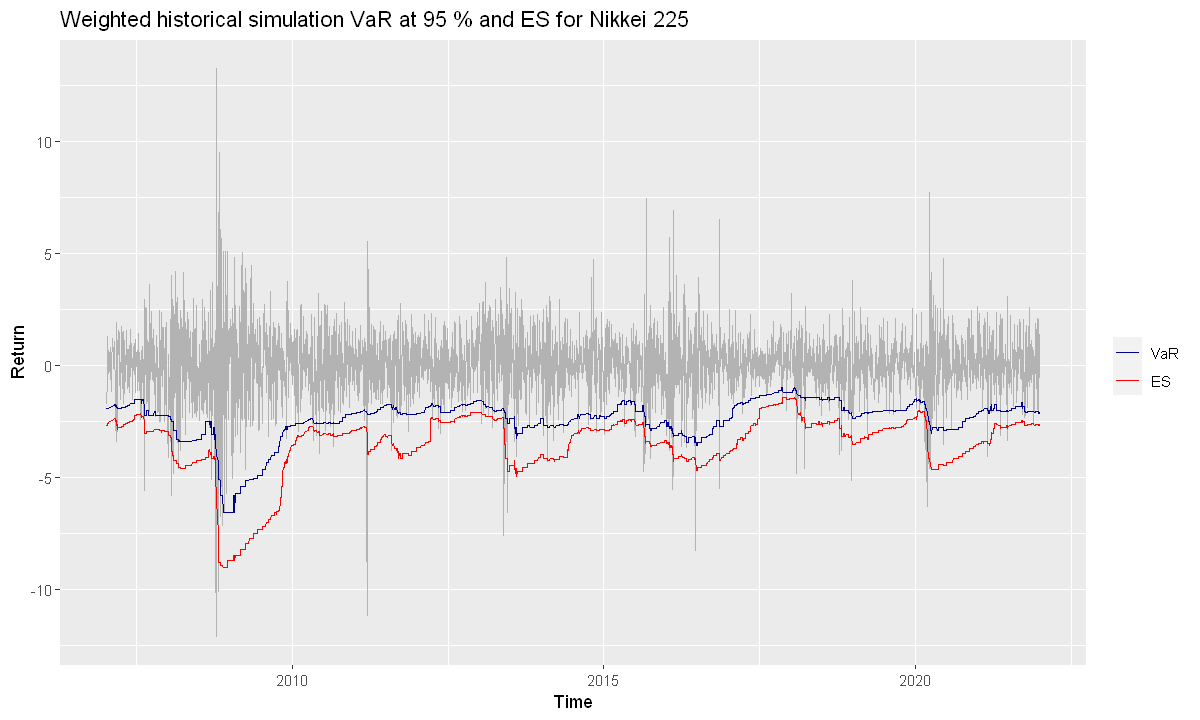

In [37]:
day = as.Date(nikkei_225_d$Date[-1])

df11 <- data.frame(
  day = day[251:3918],
  rate = rate_of_return_nikkei_225[251:3918],
  var = weighted_historical_95_nikkei_225_var,
  es = weighted_historical_95_nikkei_225_es
)

ggplot(data = df11, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.3) +
  geom_line(aes(x = df11$day, y = df11$var, color = 'darkblue'), size = 0.5) +
  geom_line(aes(x = df11$day, y = df11$es, color = 'red'), size = 0.5) +
  ggtitle("Weighted historical simulation VaR at 95 % and ES for Nikkei 225") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

**Shanghai Composite**

In [38]:
weighted_historical_list <- weighted_historical(rate_of_return_shanghai, 0.05)
weighted_historical_95_shanghai_var <- weighted_historical_list$h1
weighted_historical_95_shanghai_es <- weighted_historical_list$h2

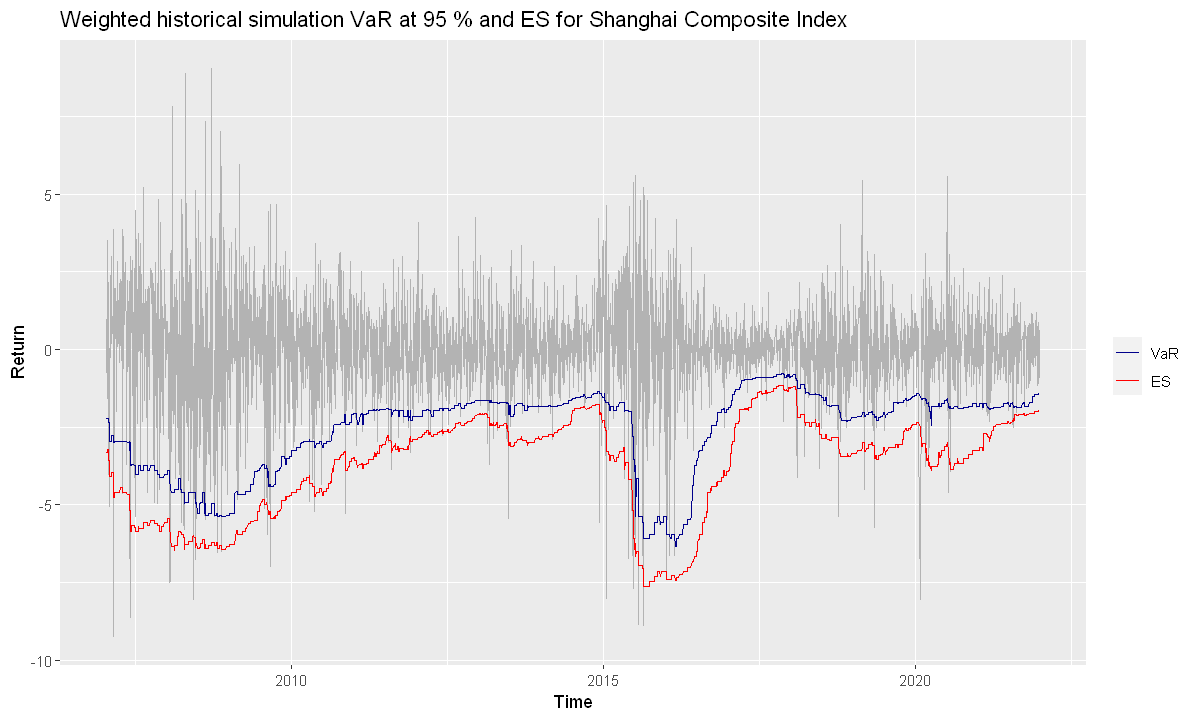

In [39]:
day = as.Date(shanghai_d$Date[-1])

df12 <- data.frame(
  day = day[251:3889],
  rate = rate_of_return_shanghai[251:3889],
  var = weighted_historical_95_shanghai_var,
  es = weighted_historical_95_shanghai_es
)

ggplot(data = df12, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.3) +
  geom_line(aes(x = df12$day, y = df12$var, color = 'darkblue'), size = 0.5) +
  geom_line(aes(x = df12$day, y = df12$es, color = 'red'), size = 0.5) +
  ggtitle("Weighted historical simulation VaR at 95 % and ES for Shanghai Composite Index") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

### 2.2.2 99% confidence interval

**Nasdaq Composite**

In [40]:
weighted_historical_list <- weighted_historical(rate_of_return_nasdaq, 0.01)
weighted_historical_99_nasdaq_var <- weighted_historical_list$h1
weighted_historical_99_nasdaq_es <- weighted_historical_list$h2

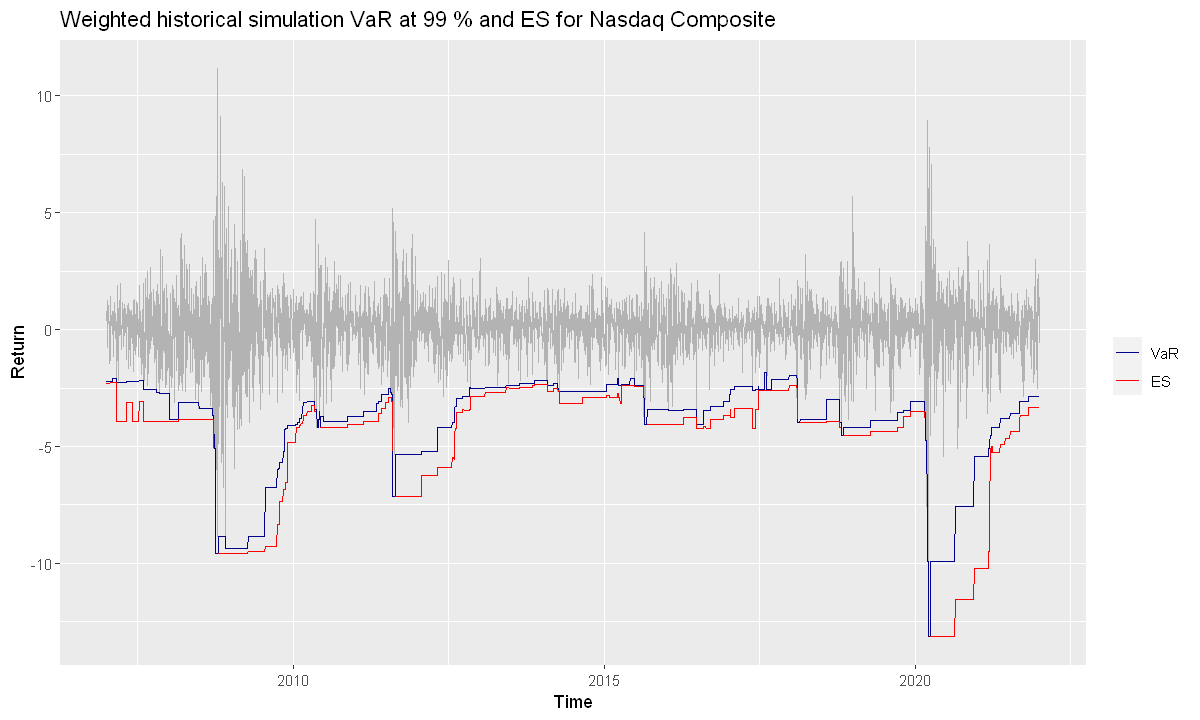

In [41]:
day = as.Date(nasdaq_d$Date[-1])

df13 <- data.frame(
  day = day[251:4029],
  rate = rate_of_return_nasdaq[251:4029],
  var = weighted_historical_99_nasdaq_var,
  es = weighted_historical_99_nasdaq_es
)

ggplot(data = df13, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.3) +
  geom_line(aes(x = df13$day, y = df13$var, color = 'darkblue'), size = 0.2) +
  geom_line(aes(x = df13$day, y = df13$es, color = 'red'), size = 0.2) +
  ggtitle("Weighted historical simulation VaR at 99 % and ES for Nasdaq Composite") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

**Nikkei 225**

In [42]:
weighted_historical_list <- weighted_historical(rate_of_return_nikkei_225, 0.01)
weighted_historical_99_nikkei_225_var <- weighted_historical_list$h1
weighted_historical_99_nikkei_225_es <- weighted_historical_list$h2

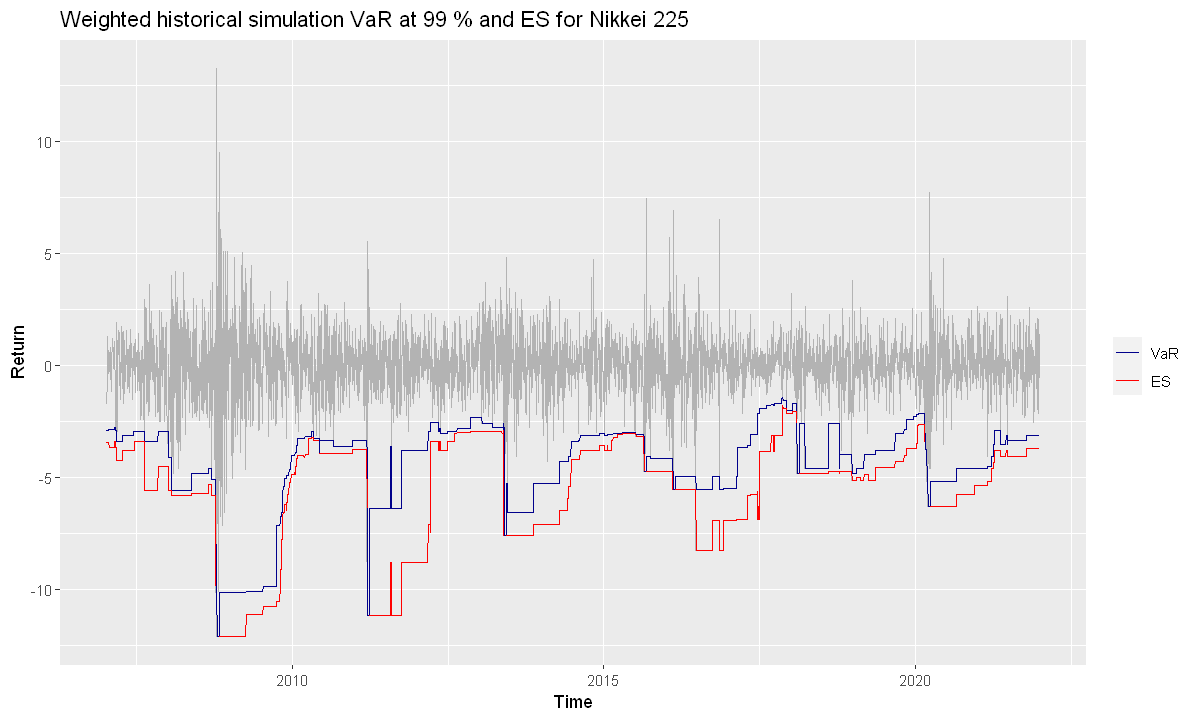

In [43]:
day = as.Date(nikkei_225_d$Date[-1])

df14 <- data.frame(
  day = day[251:3918],
  rate = rate_of_return_nikkei_225[251:3918],
  var = weighted_historical_99_nikkei_225_var,
  es = weighted_historical_99_nikkei_225_es
)

ggplot(data = df14, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.3) +
  geom_line(aes(x = df14$day, y = df14$var, color = 'darkblue'), size = 0.5) +
  geom_line(aes(x = df14$day, y = df14$es, color = 'red'), size = 0.5) +
  ggtitle("Weighted historical simulation VaR at 99 % and ES for Nikkei 225") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

**Shanghai Composite**

In [44]:
weighted_historical_list <- weighted_historical(rate_of_return_shanghai, 0.01)
weighted_historical_99_shanghai_var <- weighted_historical_list$h1
weighted_historical_99_shanghai_es <- weighted_historical_list$h2

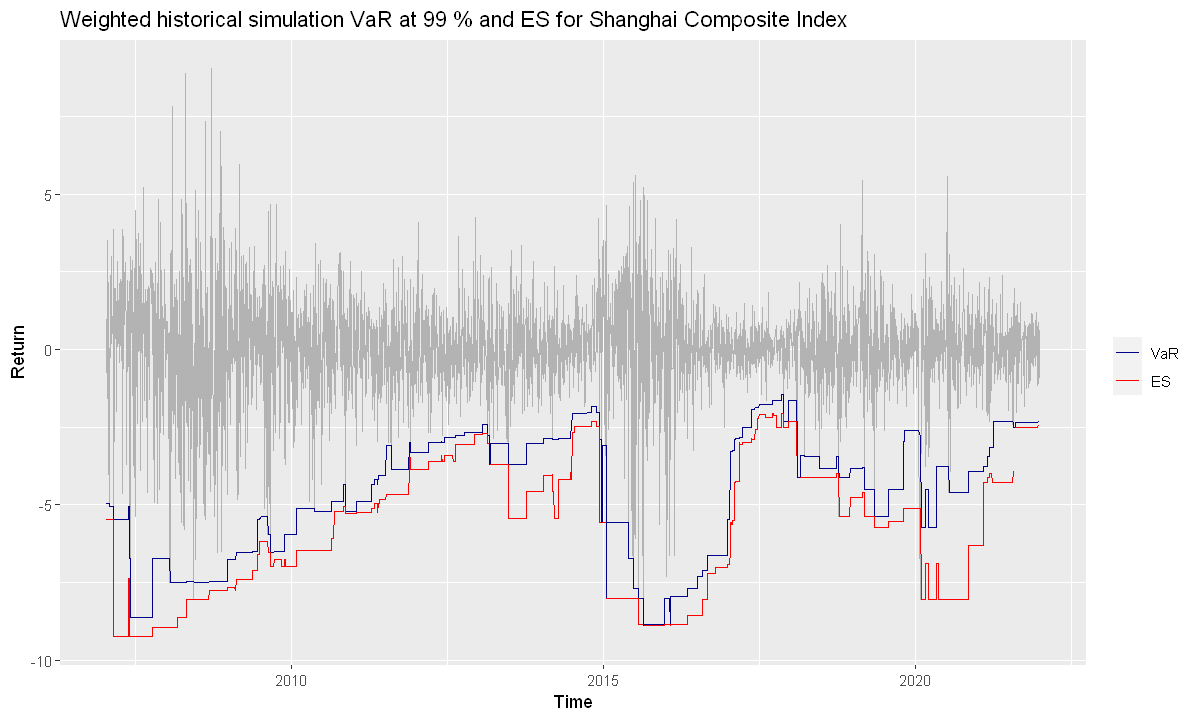

In [45]:
day = as.Date(shanghai_d$Date[-1])

df15 <- data.frame(
  day = day[251:3889],
  rate = rate_of_return_shanghai[251:3889],
  var = weighted_historical_99_shanghai_var,
  es = weighted_historical_99_shanghai_es
)

ggplot(data = df15, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.3) +
  geom_line(aes(x = df15$day, y = df15$var, color = 'darkblue'), size = 0.5) +
  geom_line(aes(x = df15$day, y = df15$es, color = 'red'), size = 0.5) +
  ggtitle("Weighted historical simulation VaR at 99 % and ES for Shanghai Composite Index") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

## 2.3 EWMA method

In [46]:
ewma <- function(x, a){
  s2 <- rep(length(x), 0)
  lambda = 0.94
  s2[1] <- (1 - lambda) * x[1]^2
  for(i in 2:length(x)){
    s2[i] = lambda*s2[i - 1] + (1 - lambda) * x[i - 1]^2
  }
  s <- rep(length(x), 0)
  for(i in 1:length(s2)){
    s[i] <- sqrt(s2[i])
  }
  ewma_var <- c()
  ewma_es <- c()
  for(i in 0:(length(x) - 251)){
    window_var <- rep(250, 0)
    window_es <- c()
    for(j in 1:250){
      window_var[j] = x[i + j] * s[i + 250 + 1] / s[i + j]
    }
    value_var <- quantile(window_var, a)
    for(j in 1:250){
      if(window_var[j] < value_var){
        window_es <- append(window_es, window_var[j]) 
      }
    }
    value_es <- mean(window_es)
    ewma_var <- append(ewma_var, value_var)
    ewma_es <- append(ewma_es, value_es)
  }
  return(list(h1 = ewma_var, h2 = ewma_es))
}

### 2.3.1 95% confidence interval

**Nasdaq Composite**

In [47]:
ewma_list <- ewma(rate_of_return_nasdaq, 0.05)
ewma_95_nasdaq_var <- ewma_list$h1
ewma_95_nasdaq_es <- ewma_list$h2

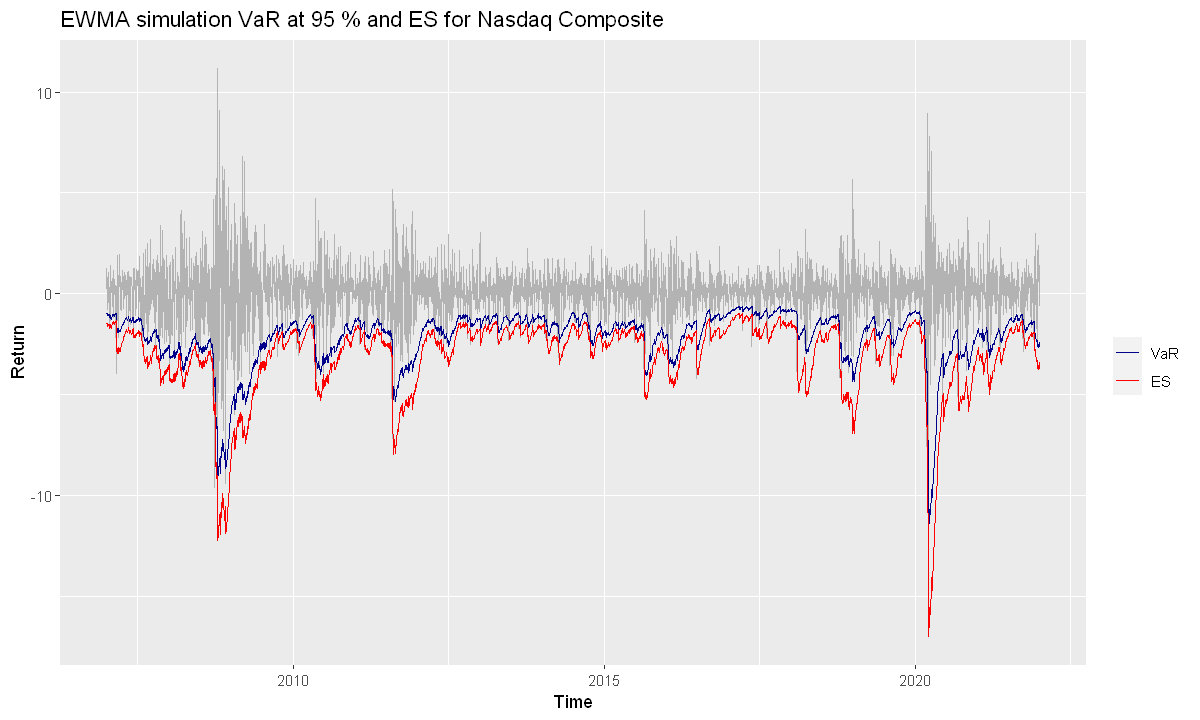

In [48]:
day = as.Date(nasdaq_d$Date[-1])

df16 <- data.frame(
  day = day[252:4029],
  rate = rate_of_return_nasdaq[252:4029],
  var = ewma_95_nasdaq_var,
  es = ewma_95_nasdaq_es
)

ggplot(data = df16, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.3) +
  geom_line(aes(x = df16$day, y = df16$var, color = 'darkblue'), size = 0.5) +
  geom_line(aes(x = df16$day, y = df16$es, color = 'red'), size = 0.5) +
  ggtitle("EWMA simulation VaR at 95 % and ES for Nasdaq Composite") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

**Nikkei 225**

In [49]:
ewma_list <- ewma(rate_of_return_nikkei_225, 0.05)
ewma_95_nikkei_225_var <- ewma_list$h1
ewma_95_nikkei_225_es <- ewma_list$h2

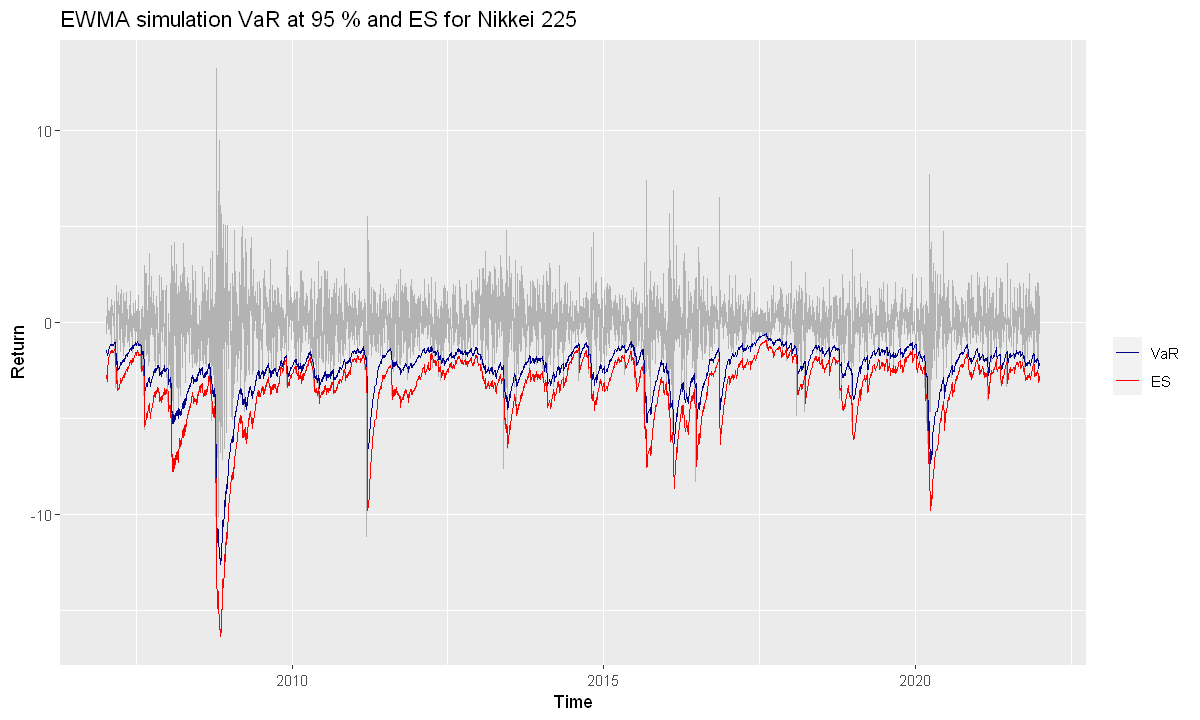

In [50]:
day = as.Date(nikkei_225_d$Date[-1])

df17 <- data.frame(
  day = day[252:3918],
  rate = rate_of_return_nikkei_225[252:3918],
  var = ewma_95_nikkei_225_var,
  es = ewma_95_nikkei_225_es
)

ggplot(data = df17, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.3) +
  geom_line(aes(x = df17$day, y = df17$var, color = 'darkblue'), size = 0.5) +
  geom_line(aes(x = df17$day, y = df17$es, color = 'red'), size = 0.5) +
  ggtitle("EWMA simulation VaR at 95 % and ES for Nikkei 225") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

**Shanghai Composite**

In [51]:
ewma_list <- ewma(rate_of_return_shanghai, 0.05)
ewma_95_shanghai_var <- ewma_list$h1
ewma_95_shanghai_es <- ewma_list$h2

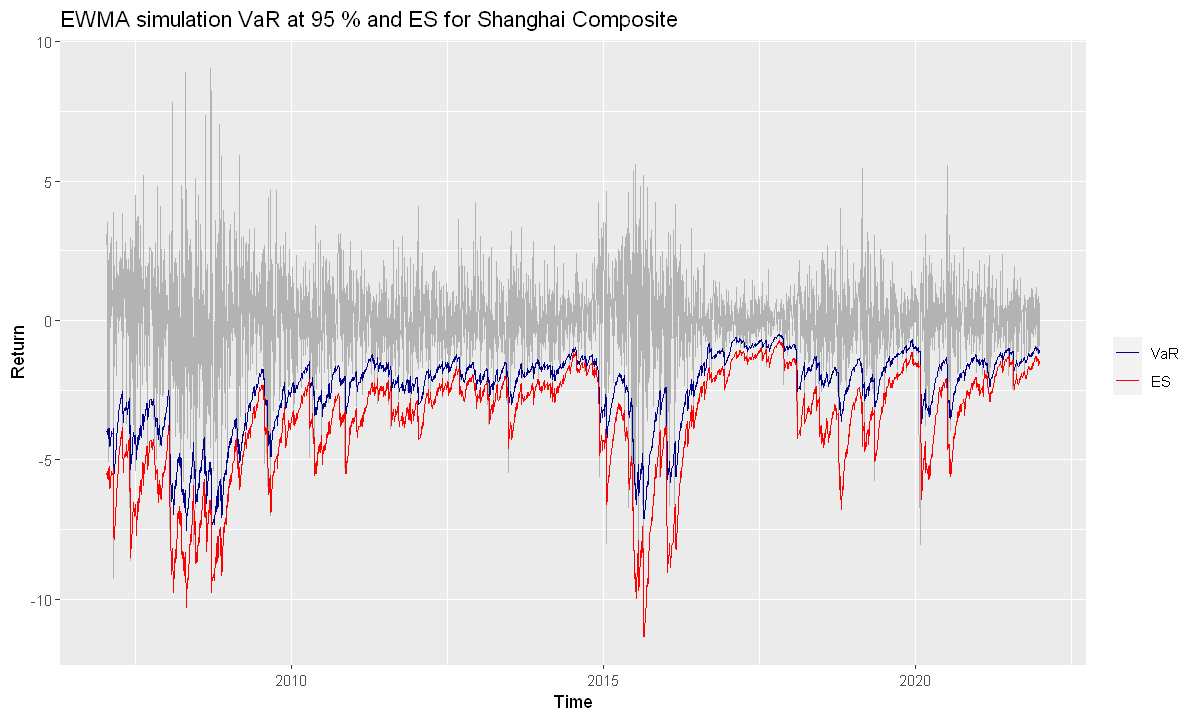

In [52]:
day = as.Date(shanghai_d$Date[-1])

df18 <- data.frame(
  day = day[252:3889],
  rate = rate_of_return_shanghai[252:3889],
  var = ewma_95_shanghai_var,
  es = ewma_95_shanghai_es
)

ggplot(data = df18, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.3) +
  geom_line(aes(x = df18$day, y = df18$var, color = 'darkblue'), size = 0.5) +
  geom_line(aes(x = df18$day, y = df18$es, color = 'red'), size = 0.5) +
  ggtitle("EWMA simulation VaR at 95 % and ES for Shanghai Composite") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

### 2.3.2 99% confidence interval

**Nasdaq Composite**

In [53]:
ewma_list <- ewma(rate_of_return_nasdaq, 0.01)
ewma_99_nasdaq_var <- ewma_list$h1
ewma_99_nasdaq_es <- ewma_list$h2

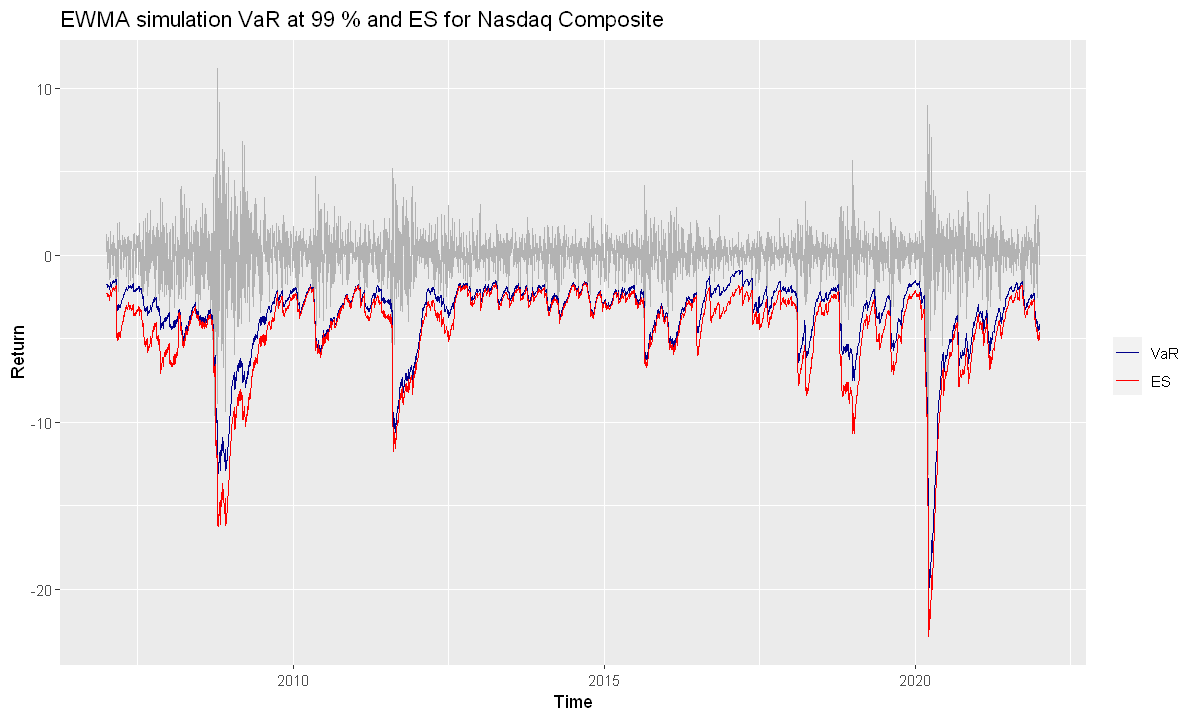

In [54]:
day = as.Date(nasdaq_d$Date[-1])

df19 <- data.frame(
  day = day[252:4029],
  rate = rate_of_return_nasdaq[252:4029],
  var = ewma_99_nasdaq_var,
  es = ewma_99_nasdaq_es
)

ggplot(data = df19, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.3) +
  geom_line(aes(x = df19$day, y = df19$var, color = 'darkblue'), size = 0.1) +
  geom_line(aes(x = df19$day, y = df19$es, color = 'red'), size = 0.3) +
  ggtitle("EWMA simulation VaR at 99 % and ES for Nasdaq Composite") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

**Nikkei 225**

In [55]:
ewma_list <- ewma(rate_of_return_nikkei_225, 0.01)
ewma_99_nikkei_225_var <- ewma_list$h1
ewma_99_nikkei_225_es <- ewma_list$h2

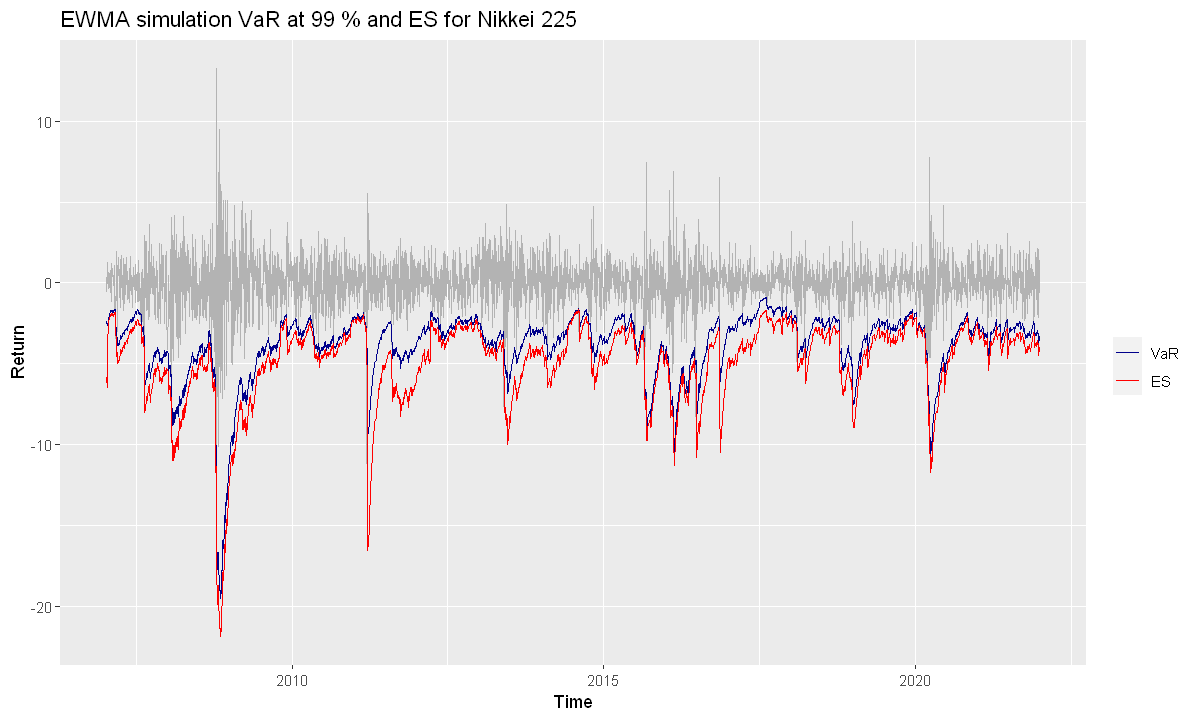

In [56]:
day = as.Date(nikkei_225_d$Date[-1])

df20 <- data.frame(
  day = day[252:3918],
  rate = rate_of_return_nikkei_225[252:3918],
  var = ewma_99_nikkei_225_var,
  es = ewma_99_nikkei_225_es
)

ggplot(data = df20, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.3) +
  geom_line(aes(x = df20$day, y = df20$var, color = 'darkblue'), size = 0.5) +
  geom_line(aes(x = df20$day, y = df20$es, color = 'red'), size = 0.5) +
  ggtitle("EWMA simulation VaR at 99 % and ES for Nikkei 225") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

**Shanghai Composite**

In [57]:
ewma_list <- ewma(rate_of_return_shanghai, 0.01)
ewma_99_shanghai_var <- ewma_list$h1
ewma_99_shanghai_es <- ewma_list$h2

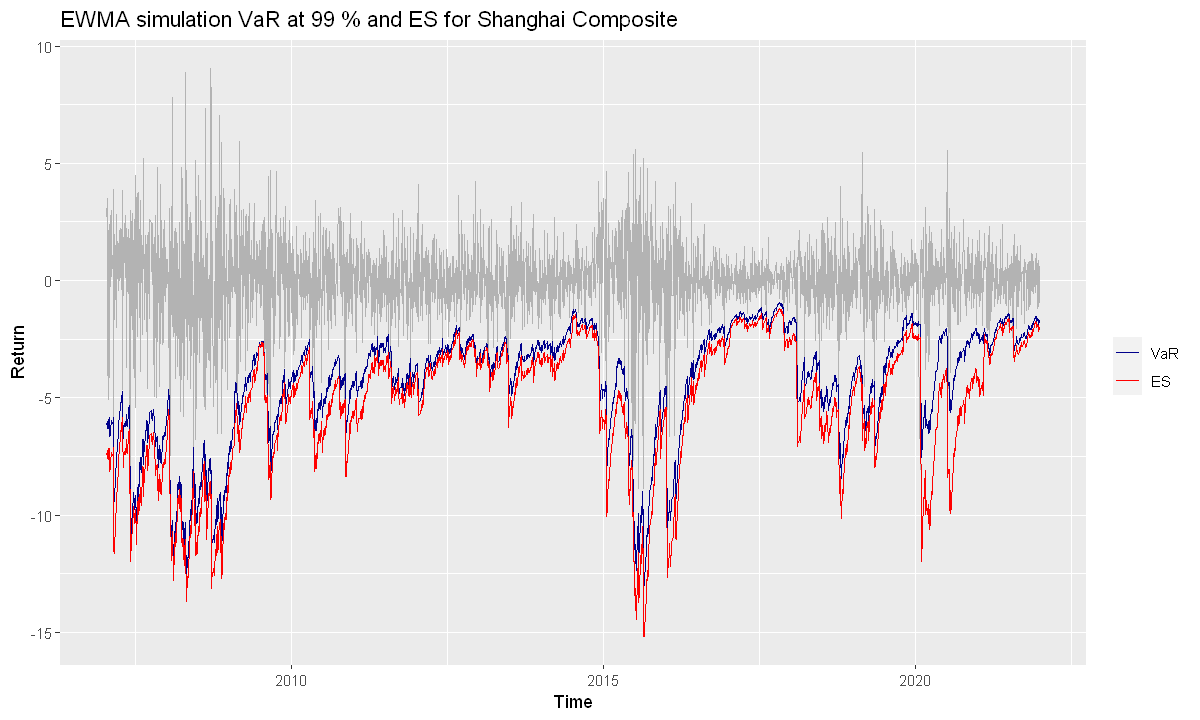

In [58]:
day = as.Date(shanghai_d$Date[-1])

df21 <- data.frame(
  day = day[252:3889],
  rate = rate_of_return_shanghai[252:3889],
  var = ewma_99_shanghai_var,
  es = ewma_99_shanghai_es
)

ggplot(data = df21, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.5) +
  geom_line(aes(x = df21$day, y = df21$var, color = 'darkblue'), size = 0.5) +
  geom_line(aes(x = df21$day, y = df21$es, color = 'red'), size = 0.5) +
  ggtitle("EWMA simulation VaR at 99 % and ES for Shanghai Composite") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

## 2.4 GARCH method

### 2.4.1 95% confidence interval

In [59]:
garch <- function(x, a){
  variance_garch <- c()
  gamma = 0.02
  alpha = 0.15
  beta = 0.83
  long_run_vr = 0.00015
  s2 = gamma * long_run_vr + alpha * x[1]^2
  variance_garch <- append(variance_garch, s2)
  for(i in 1:length(x)){
    s2 = gamma * long_run_vr + alpha * x[i]^2 + beta * s2
    variance_garch <- append(variance_garch, s2)
  }
  sd_garch <- c()
  for(i in 1: length(variance_garch)){
    s <- sqrt(variance_garch[i])
    sd_garch <- append(sd_garch, s)
  }
  
  garch_var <- c()
  garch_es <- c()
  for(i in 0:(length(x) - 251)){
    window_var <- c()
    window_es <- c()
    for(j in 1:250){
      scenario_1 <- x[i + j]* sd_garch[i + 251]/sd_garch[i + j]
      window_var <- append(window_var, scenario_1)
    }
    value_var <- quantile(window_var, a)
    for(j in 1:250){
      if(window_var[j] < value_var){
        window_es <- append(window_es, window_var[j])
      }
    }
    value_es <- mean(window_es)
    garch_var <- append(garch_var, value_var)
    garch_es <- append(garch_es, value_es)
  }
  return(list(h1 = garch_var, h2 = garch_es))
}

**Nasdaq Composite**

In [60]:
garch_list <- garch(rate_of_return_nasdaq, 0.05)
garch_95_nasdaq_var <- garch_list$h1
garch_95_nasdaq_es <- garch_list$h2

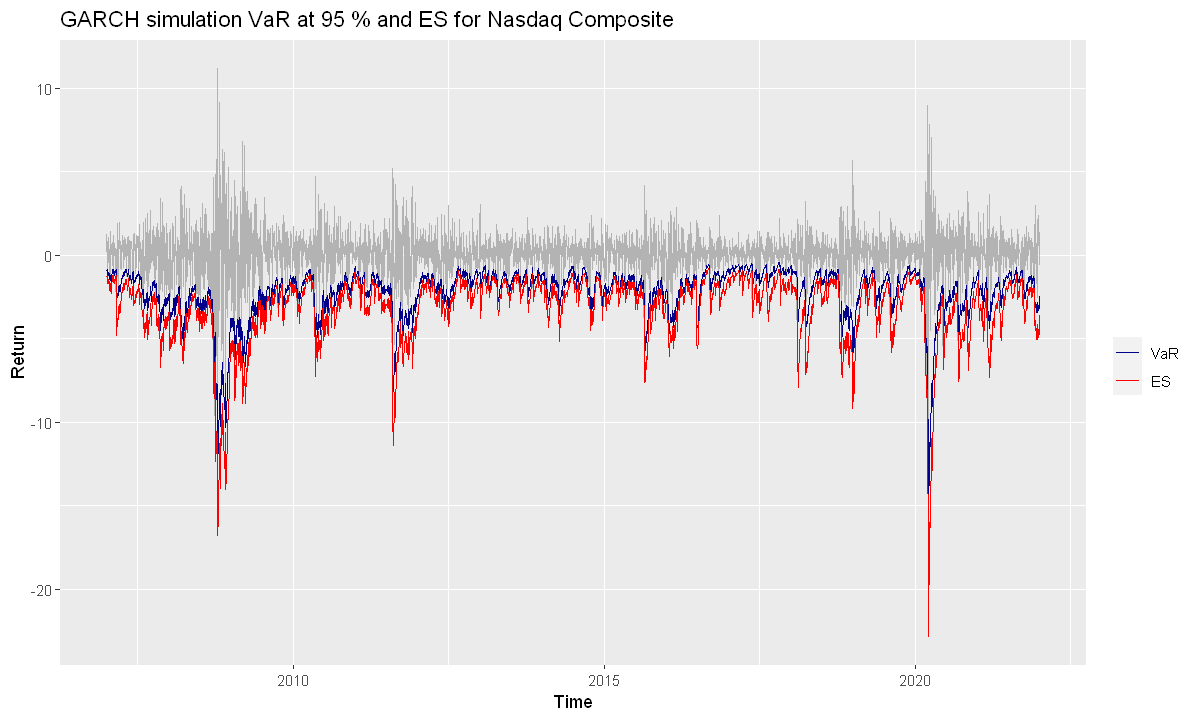

In [61]:
day = as.Date(nasdaq_d$Date[-1])

df22 <- data.frame(
  day = day[252:4029],
  rate = rate_of_return_nasdaq[252:4029],
  var = garch_95_nasdaq_var,
  es = garch_95_nasdaq_es
)

ggplot(data = df22, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.3) +
  geom_line(aes(x = df22$day, y = df22$var, color = 'darkblue'), size = 0.5) +
  geom_line(aes(x = df22$day, y = df22$es, color = 'red'), size = 0.5) +
  ggtitle("GARCH simulation VaR at 95 % and ES for Nasdaq Composite") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

**Nikkei 225**

In [62]:
garch_list <- garch(rate_of_return_nikkei_225, 0.05)
garch_95_nikkei_225_var <- garch_list$h1
garch_95_nikkei_225_es <- garch_list$h2

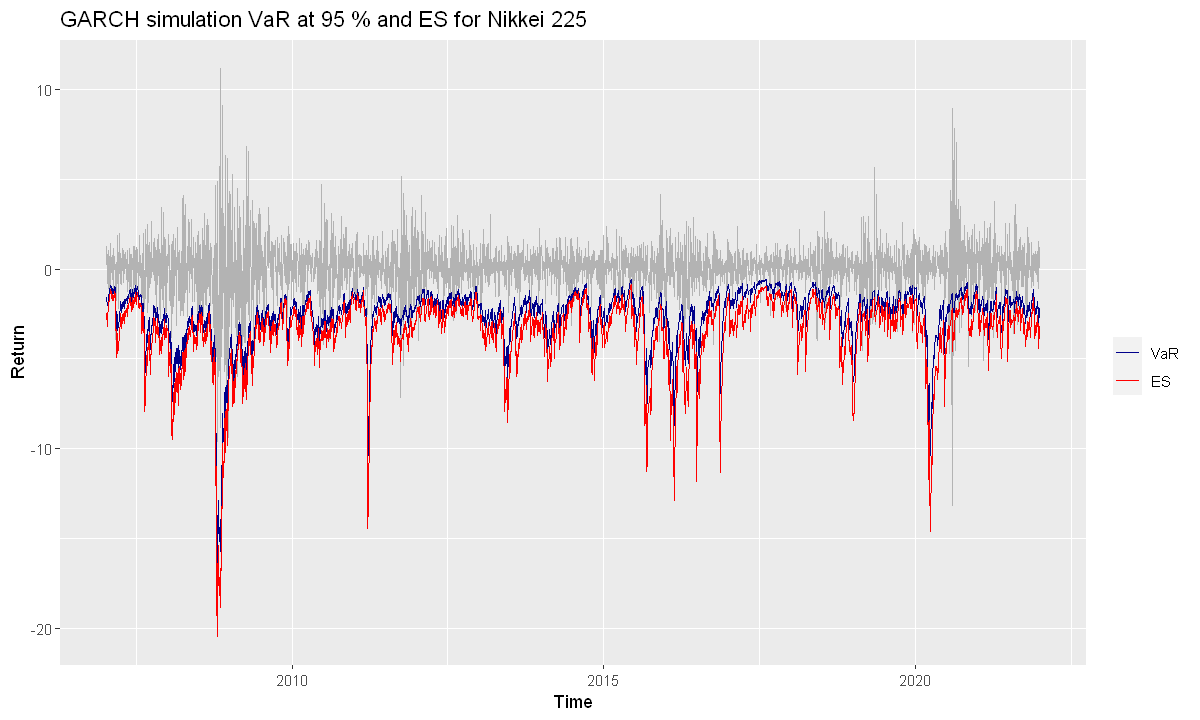

In [64]:
day = as.Date(nikkei_225_d$Date[-1])

df23 <- data.frame(
  day = day[252:3918],
  rate = rate_of_return_nasdaq[252:3918],
  var = garch_95_nikkei_225_var,
  es = garch_95_nikkei_225_es
)

ggplot(data = df23, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.3) +
  geom_line(aes(x = df23$day, y = df23$var, color = 'darkblue'), size = 0.5) +
  geom_line(aes(x = df23$day, y = df23$es, color = 'red'), size = 0.5) +
  ggtitle("GARCH simulation VaR at 95 % and ES for Nikkei 225") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

**Shanghai Composite**

In [65]:
garch_list <- garch(rate_of_return_shanghai, 0.05)
garch_95_shanghai_var <- garch_list$h1
garch_95_shanghai_es <- garch_list$h2

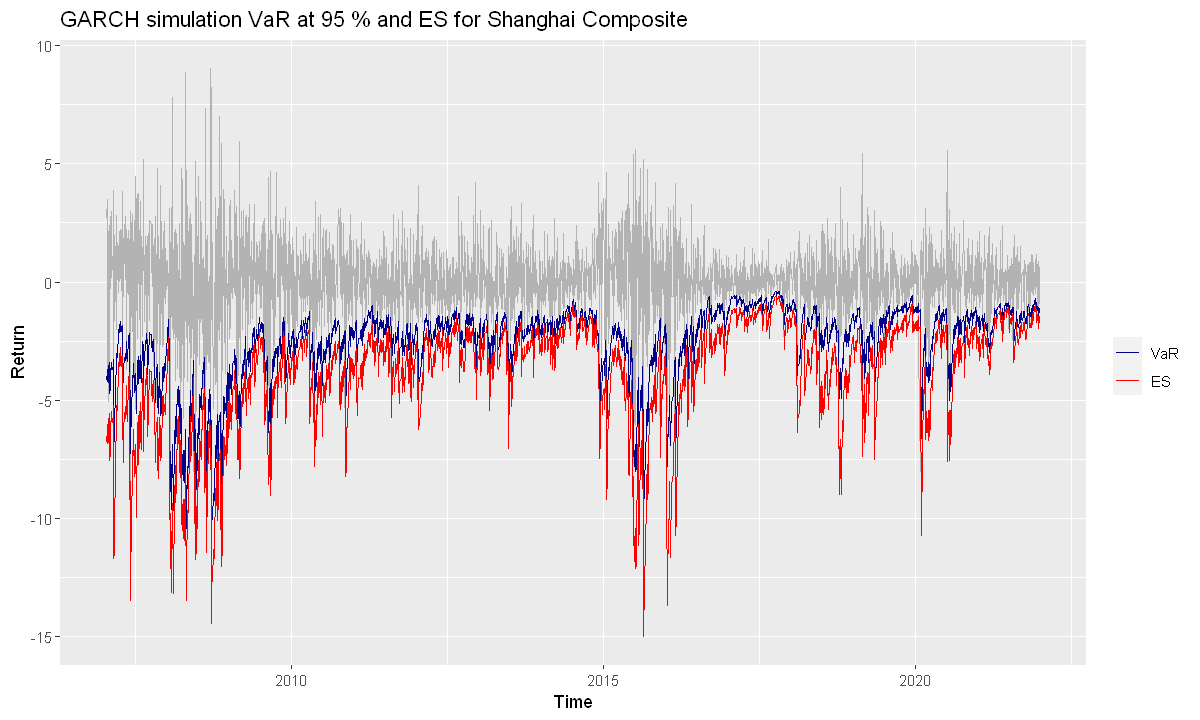

In [66]:
day = as.Date(shanghai_d$Date[-1])

df24 <- data.frame(
  day = day[252:3889],
  rate = rate_of_return_shanghai[252:3889],
  var = garch_95_shanghai_var,
  es = garch_95_shanghai_es
)

ggplot(data = df24, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.3) +
  geom_line(aes(x = df24$day, y = df24$var, color = 'darkblue'), size = 0.3) +
  geom_line(aes(x = df24$day, y = df24$es, color = 'red'), size = 0.5) +
  ggtitle("GARCH simulation VaR at 95 % and ES for Shanghai Composite") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

### 2.4.2 99% confidence interval

**Nasdaq Composite**

In [67]:
garch_list <- garch(rate_of_return_nasdaq, 0.01)
garch_99_nasdaq_var <- garch_list$h1
garch_99_nasdaq_es <- garch_list$h2

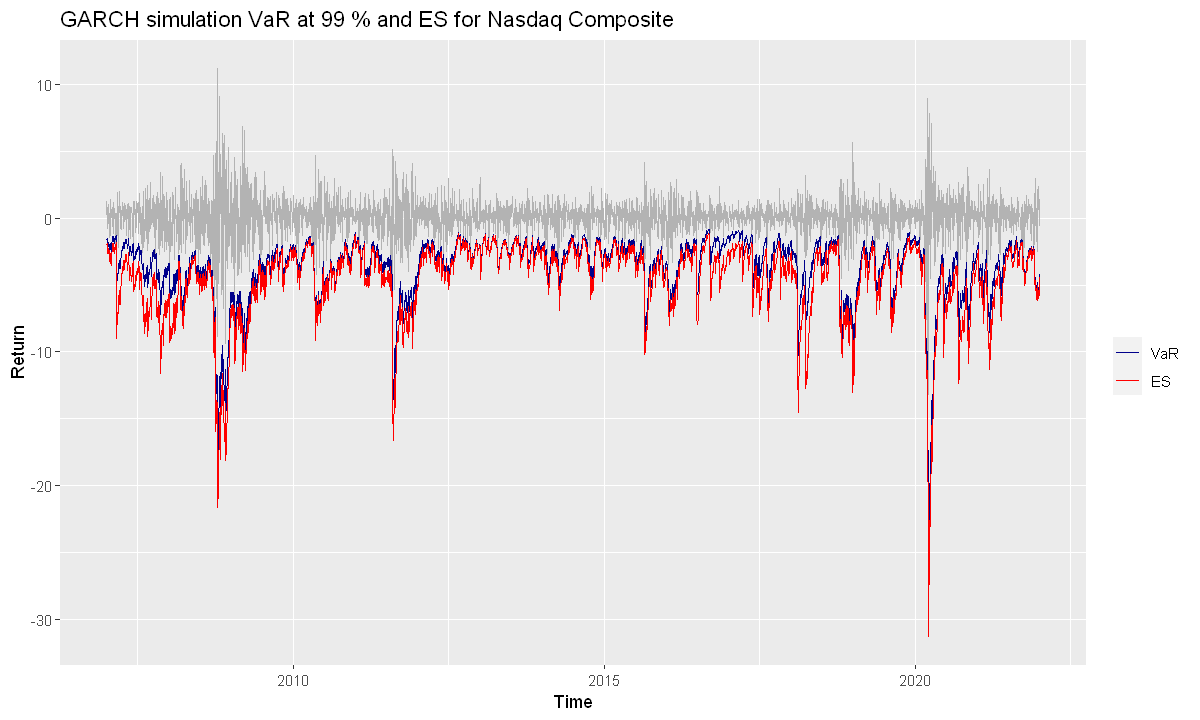

In [68]:
day = as.Date(nasdaq_d$Date[-1])

df25 <- data.frame(
  day = day[252:4029],
  rate = rate_of_return_nasdaq[252:4029],
  var = garch_99_nasdaq_var,
  es = garch_99_nasdaq_es
)

ggplot(data = df25, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.3) +
  geom_line(aes(x = df25$day, y = df25$var, color = 'darkblue'), size = 0.5) +
  geom_line(aes(x = df25$day, y = df25$es, color = 'red'), size = 0.5) +
  ggtitle("GARCH simulation VaR at 99 % and ES for Nasdaq Composite") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

**Nikkei 225**

In [69]:
garch_list <- garch(rate_of_return_nikkei_225, 0.01)
garch_99_nikkei_225_var <- garch_list$h1
garch_99_nikkei_225_es <- garch_list$h2

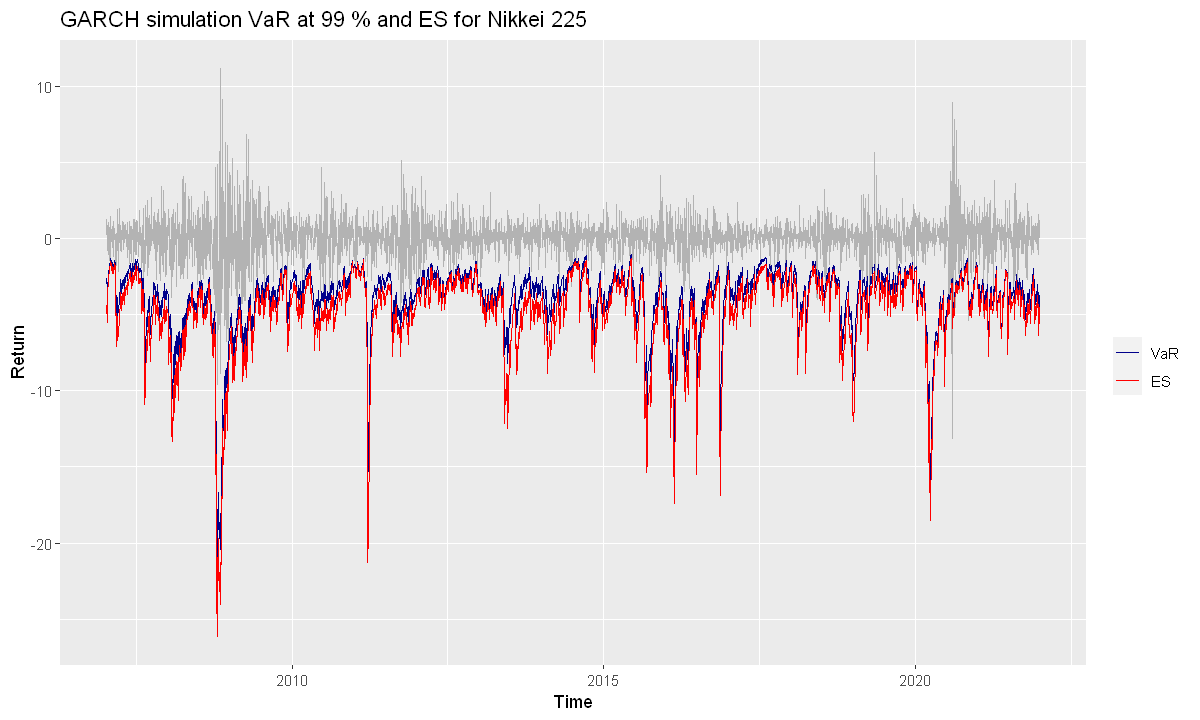

In [118]:
day = as.Date(nikkei_225_d$Date[-1])

df26 <- data.frame(
  day = day[252:3918],
  rate = rate_of_return_nasdaq[252:3918],
  var = garch_99_nikkei_225_var,
  es = garch_99_nikkei_225_es
)

ggplot(data = df26, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.3) +
  geom_line(aes(x = df26$day, y = df26$var, color = 'darkblue'), size = 0.5) +
  geom_line(aes(x = df26$day, y = df26$es, color = 'red'), size = 0.5) +
  ggtitle("GARCH simulation VaR at 99 % and ES for Nikkei 225") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

**Shanghai Composite**

In [119]:
garch_list <- garch(rate_of_return_shanghai, 0.01)
garch_99_shanghai_var <- garch_list$h1
garch_99_shanghai_es <- garch_list$h2

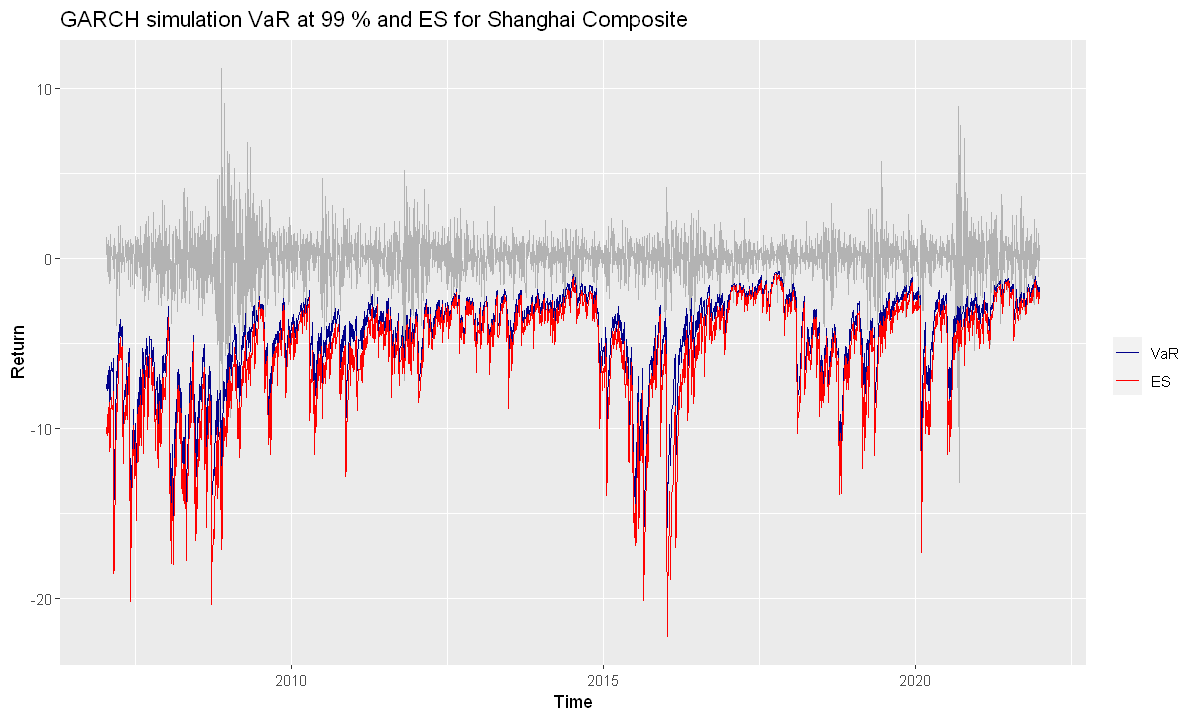

In [120]:
day = as.Date(shanghai_d$Date[-1])

df27 <- data.frame(
  day = day[252:3889],
  rate = rate_of_return_nasdaq[252:3889],
  var = garch_99_shanghai_var,
  es = garch_99_shanghai_es
)

ggplot(data = df27, aes(x = day, y = rate)) + 
  geom_line(color = "gray70", size = 0.3) +
  geom_line(aes(x = df27$day, y = df27$var, color = 'darkblue'), size = 0.5) +
  geom_line(aes(x = df27$day, y = df27$es, color = 'red'), size = 0.5) +
  ggtitle("GARCH simulation VaR at 99 % and ES for Shanghai Composite") +
  ylab('Return')+xlab('Time') +
  scale_colour_manual(name = '',values =c('darkblue'='darkblue', 'red' = 'red'),
                      labels = c('VaR','ES'))

# 3. Backtesting

## 3.1 Christoffersen's Test of Independence 1998

The 1998 Christoffersen test is one of the tests used to study the independence of events over time with the following hypotheses:

H0: VaR overruns are time independent H1: VaR overruns are not time independent

The following function is an implementation of this method based on the theory and task from the book 'Value-at-Risk Second Edition - by Glyn A. Holton' taking two vectors: phrases (x) and VaR (y), and returning the calculated statistic of the test and p- value.

In [70]:
christoffersen_test <- function(x, y){
  a00 = 0
  a01 = 0
  a10 = 0
  a11 = 0
  ret <- x[250:length(x)]
  prd <- y
  nt <- c()
  for(i in 0:(length(x) - 250)){
    if(ret[i + 1] <= prd[i + 1]){
      nt <- append(nt, 1)
    }
    else{
      nt <- append(nt, 0)
    }
  }
  for(i in 0:(length(x) - 251)){
    if((nt[i + 1] == 0) & (nt[i + 1 + 1] == 0)){
      a00 = a00 + 1
    }
    else if(nt[i + 1] == 0 && nt[i + 1 + 1] == 1){
      a01 = a01 + 1
    }
    else if(nt[i + 1] == 1 && nt[i + 1 + 1] == 0){
      a10 = a10 + 1
    }
    else if(nt[i + 1] == 1 && nt[i + 1 + 1] == 1){
      a11 = a11 + 1
    }
  }
  q0 = round(a00/(a00 + a01), 4)
  q1 = round(a10/(a10 + a11), 4)
  q = round((a00 + a10) / (a00 + a01 + a10 + a11), 4)
  ratio = round((q/q0)^a00 * ((1 - q)/(1 - q0))^a01 * (q/q1)^a10 * ((1 - q)/(1 - q1))^a11, 5)
  ch2f1 = -2*log(ratio)
  ch2f1 = round(ch2f1, 3)
  pval = round(pchisq(q = ch2f1, df=1, lower.tail=FALSE), 3)
  print(paste0("Test Statistic: ", ch2f1))
  print(paste0("       P-Value: ", pval))
}

## 3.1.1 Historical simulation method

**95% confidence interval**

In [71]:
christoffersen_test(rate_of_return_nasdaq, historical_95_nasdaq_var)

[1] "Test Statistic: 9.171"
[1] "       P-Value: 0.002"


In [72]:
christoffersen_test(rate_of_return_nikkei_225, historical_95_nikkei_225_var)

[1] "Test Statistic: 10.83"
[1] "       P-Value: 0.001"


In [73]:
christoffersen_test(rate_of_return_shanghai, historical_95_shanghai_var)

[1] "Test Statistic: 12.585"
[1] "       P-Value: 0"


The test statistic of the study of the independence of events over time for the Nasdaq Composite index, with the adopted significance level of 5%, has a value of 9.171. It exceeds the 0.95 quantile of the chi-square distribution (1.0), which is 3.841. P-value of 0.002 <0.05. This means rejection of the null hypothesis about independent VaR exceedances in time.

The test statistic for examining the independence of events in time for the Nikkei 225 index, with the adopted significance level of 5%, has a value of 10.830. It exceeds the 0.95 quantile of the chi-square distribution (1.0), which is 3.841. P-value of 0.001 <0.05. This means rejection of the null hypothesis about independent VaR exceedances in time.

The test statistic of examining the independence of events over time for the Shanghai Composite index, with the adopted significance level of 5%, has a value of 12,585. It exceeds the 0.95 quantile of the chi-square distribution (1.0), which is 3.841. P-value of 0.000 <0.05. This means rejection of the null hypothesis about independent VaR exceedances in time.

**99% confidence interval**

In [74]:
christoffersen_test(rate_of_return_nasdaq, historical_99_nasdaq_var)

[1] "Test Statistic: 6.148"
[1] "       P-Value: 0.013"


In [75]:
christoffersen_test(rate_of_return_nikkei_225, historical_99_nikkei_225_var)

[1] "Test Statistic: 14.094"
[1] "       P-Value: 0"


In [76]:
christoffersen_test(rate_of_return_shanghai, historical_99_shanghai_var)

[1] "Test Statistic: 5.728"
[1] "       P-Value: 0.017"


The test statistic of the study of the independence of events in time for the Nasdaq Composite index, with the adopted significance level of 1%, has a value of 6.148. It does not exceed the 0.99 quantile of the chi-square distribution (1.0), which is 6.635. P-value equal to 0.013> 0.01. This means that there are no grounds to reject the null hypothesis of independent VaR exceedances in time.

The test statistic for examining the independence of events in time for the Nikkei 225 index, with the adopted significance level of 1%, has a value of 14.094. It exceeds the 0.99 quantile of the chi-square distribution (1.0), which is 6.635. P-value of 0.000 <0.01. This means rejection of the null hypothesis about independent VaR exceedances in time.

The test statistic of examining the independence of events over time for the Shanghai Composite index, with the adopted significance level of 1%, has a value of 5.728. It does not exceed the 0.99 quantile of the chi-square distribution (1.0), which is 6.635. P-value equal to 0.017> 0.01. This means that there are no grounds to reject the null hypothesis of independent VaR exceedances in time.

### 3.1.2 Historical method with weights

**95% confidence interval**

In [77]:
christoffersen_test(rate_of_return_nasdaq, weighted_historical_95_nasdaq_var)

[1] "Test Statistic: 1.554"
[1] "       P-Value: 0.213"


In [78]:
christoffersen_test(rate_of_return_nikkei_225, weighted_historical_95_nikkei_225_var)

[1] "Test Statistic: 10.549"
[1] "       P-Value: 0.001"


In [79]:
christoffersen_test(rate_of_return_shanghai, weighted_historical_95_shanghai_var)

[1] "Test Statistic: 4.539"
[1] "       P-Value: 0.033"


The test statistic of the study of the independence of events over time for the Nasdaq Composite index, with the adopted significance level of 5%, has a value of 1.554. It does not exceed the 0.95 quantile of the chi-square distribution (1.0), which is 3.841. P-value equal to 0.213> 0.05. This means that there are no grounds to reject the null hypothesis about independent VaR exceedances in time.

The test statistic for examining the independence of events in time for the Nikkei 225 index, with the adopted significance level of 5%, has a value of 10.549. It exceeds the 0.95 quantile of the chi-square distribution (1.0), which is 3.841. P-value of 0.001 <0.05. This means rejection of the null hypothesis about independent VaR exceedances in time.

The test statistic for examining the independence of events over time for the Shanghai Composite index, with the adopted significance level of 5%, is 4.539. It exceeds the 0.95 quantile of the chi-square distribution (1.0), which is 3.841. P-value of 0.033 <0.05. This means rejection of the null hypothesis about independent VaR exceedances in time.

**99% confidence interval**

In [80]:
christoffersen_test(rate_of_return_nasdaq, weighted_historical_99_nasdaq_var)

[1] "Test Statistic: 3.526"
[1] "       P-Value: 0.06"


In [81]:
christoffersen_test(rate_of_return_nikkei_225, weighted_historical_99_nikkei_225_var)

[1] "Test Statistic: 4.193"
[1] "       P-Value: 0.041"


In [82]:
christoffersen_test(rate_of_return_shanghai, weighted_historical_99_shanghai_var)

[1] "Test Statistic: 3.962"
[1] "       P-Value: 0.047"


The test statistic of the study of the independence of events in time for the Nasdaq Composite index, with the adopted significance level of 1%, has a value of 3.526. It does not exceed the 0.99 quantile of the chi-square distribution (1.0), which is 6.635. P-value equal to 0.06> 0.01. This means that there are no grounds to reject the null hypothesis of independent VaR exceedances in time.

The test statistic for examining the independence of events in time for the Nikkei 225 index, with the adopted significance level of 1%, has a value of 4.193. It does not exceed the 0.99 quantile of the chi-square distribution (1.0), which is 6.635. P-value equal to 0.041> 0.01. This means that there are no grounds to reject the null hypothesis of independent VaR exceedances in time.

The test statistic of examining the independence of events over time for the Shanghai Composite index, with the adopted significance level of 1%, has the value of 3.962. It does not exceed the 0.99 quantile of the chi-square distribution (1.0), which is 6.635. P-value equal to 0.047> 0.01. This means that there are no grounds to reject the null hypothesis of independent VaR exceedances in time.

### 3.1.3 EWMA method

**95% confidence interval**

In [83]:
christoffersen_test(rate_of_return_nasdaq[2:4028], ewma_95_nasdaq_var)

[1] "Test Statistic: 0.003"
[1] "       P-Value: 0.956"


In [84]:
christoffersen_test(rate_of_return_nikkei_225[2:3917], ewma_95_nikkei_225_var)

[1] "Test Statistic: 1.418"
[1] "       P-Value: 0.234"


In [85]:
christoffersen_test(rate_of_return_shanghai[2:3888], ewma_95_shanghai_var)

[1] "Test Statistic: 0.244"
[1] "       P-Value: 0.621"


The test statistic of the study of the independence of events in time for the Nasdaq Composite index, with the adopted significance level of 5%, has a value of 0.003. It does not exceed the 0.95 quantile of the chi-square distribution (1.0), which is 3.841. P-value of 0.956> 0.05. This means that there are no grounds to reject the null hypothesis about independent VaR exceedances in time.

The test statistic for examining the independence of events over time for the Nikkei 225 index, with the adopted significance level of 5%, has a value of 1.418. It does not exceed the 0.95 quantile of the chi-square distribution (1.0), which is 3.841. P-value equal to 0.234> 0.05. This means that there are no grounds to reject the null hypothesis of independent VaR exceedances in time.

The test statistic for examining the independence of events over time for the Shanghai Composite index, with the adopted significance level of 5%, is 0.244. It does not exceed the 0.95 quantile of the chi-square distribution (1.0), which is 3.841. P-value of 0.621> 0.05. This means that there are no grounds to reject the null hypothesis of independent VaR exceedances in time.

**99% confidence interval**

In [86]:
christoffersen_test(rate_of_return_nasdaq[2:4028], ewma_99_nasdaq_var)

[1] "Test Statistic: 0.082"
[1] "       P-Value: 0.775"


In [87]:
christoffersen_test(rate_of_return_nikkei_225[2:3917], ewma_99_nikkei_225_var)

[1] "Test Statistic: 4.097"
[1] "       P-Value: 0.043"


In [88]:
christoffersen_test(rate_of_return_shanghai[2:3888], ewma_99_shanghai_var)

[1] "Test Statistic: 5.05"
[1] "       P-Value: 0.025"


The test statistic of the study of independence of events in time for the Nasdaq Composite index, with the adopted significance level of 1%, has the value of 0.082. It does not exceed the 0.99 quantile of the chi-square distribution (1.0), which is 6.635. P-value 0.775> 0.01. This means that there are no grounds to reject the null hypothesis of independent VaR exceedances in time.

The test statistic for examining the independence of events in time for the Nikkei 225 index, with the adopted significance level of 1%, has a value of 4.097. It does not exceed the 0.99 quantile of the chi-square distribution (1.0), which is 6.635. P-value equal to 0.043> 0.01. This means that there are no grounds to reject the null hypothesis of independent VaR exceedances in time.

The test statistic of examining the independence of events over time for the Shanghai Composite index, with the adopted significance level of 1%, has a value of 5.050. It does not exceed the 0.99 quantile of the chi-square distribution (1.0), which is 6.635. P-value equal to 0.025> 0.01. This means that there are no grounds to reject the null hypothesis of independent VaR exceedances in time.

### 3.1.4 GARCH method

**95% confidence interval**

In [89]:
christoffersen_test(rate_of_return_nasdaq[2:4028], garch_95_nasdaq_var)

[1] "Test Statistic: 2.796"
[1] "       P-Value: 0.094"


In [90]:
christoffersen_test(rate_of_return_nikkei_225[2:3917], garch_95_nikkei_225_var)

[1] "Test Statistic: 0.06"
[1] "       P-Value: 0.806"


In [91]:
christoffersen_test(rate_of_return_shanghai[2:3888], ewma_95_shanghai_var)

[1] "Test Statistic: 0.244"
[1] "       P-Value: 0.621"


The test statistic of the study of the independence of events over time for the Nasdaq Composite index, with the adopted significance level of 5%, has a value of 2.796. It does not exceed the 0.95 quantile of the chi-square distribution (1.0), which is 3.841. P-value equal to 0.094> 0.05. This means that there are no grounds to reject the null hypothesis about independent VaR exceedances in time.

The test statistic of examining the independence of events in time for the Nikkei 225 index, with the adopted significance level of 5%, has a value of 0.060. It does not exceed the 0.95 quantile of the chi-square distribution (1.0), which is 3.841. P-value of 0.806> 0.05. This means that there are no grounds to reject the null hypothesis of independent VaR exceedances in time.

The test statistic of examining the independence of events over time for the Shanghai Composite index, with the adopted significance level of 5%, has a value of 5.05. It exceeds the 0.95 quantile of the chi-square distribution (1.0), which is 3.841. P-value of 0.025 <0.05. This means the basis for rejecting the null hypothesis about independent VaR exceedances in time.

**99% confidence interval**

In [96]:
christoffersen_test(rate_of_return_nasdaq[2:4028], garch_99_nasdaq_var)

[1] "Test Statistic: 1.396"
[1] "       P-Value: 0.237"


In [97]:
christoffersen_test(rate_of_return_nikkei_225[2:3917], garch_99_nikkei_225_var)

[1] "Test Statistic: 0.109"
[1] "       P-Value: 0.741"


In [122]:
christoffersen_test(rate_of_return_shanghai[2:3888], garch_99_shanghai_var)

[1] "Test Statistic: 0.336"
[1] "       P-Value: 0.562"


The test statistic of the study of the independence of events over time for the Nasdaq Composite index, with the adopted significance level of 1%, is 1.396. It does not exceed the 0.99 quantile of the chi-square distribution (1.0), which is 6.635. P-value equal to 0.237> 0.01. This means that there are no grounds to reject the null hypothesis of independent VaR exceedances in time.

The test statistic of examining the independence of events in time for the Nikkei 225 index, with the adopted significance level of 1%, has a value of 0.109. It does not exceed the 0.99 quantile of the chi-square distribution (1.0), which is 6.635. P-value of 0.741> 0.01. This means that there are no grounds to reject the null hypothesis of independent VaR exceedances in time.

The test statistic of examining the independence of events over time for the Shanghai Composite index, with the adopted significance level of 1%, has a value of 0.336. It does not exceed the 0.99 quantile of the chi-square distribution (1.0), which is 6.635. P-value 0.562> 0.01. This means that there are no grounds to reject the null hypothesis of independent VaR exceedances in time. 

## 3.2 Kupiec Test

The Kupiec Test is one of the range tests. It is used to check whether the VaR is correctly calculated. The hypotheses for this test are as follows:

H0: VaR is well-defined H1: VaR is not well-defined

The merchant's R test is used to verify the hypothesis of this test. The test takes the vectors of returns and VaR as well as the significance level. The result of its operation is: a printout of one of the hypotheses, p-value, 1 degree of freedom chi-square distribution test statistic for a given significance level and the number of VaR exceedances found. The study uses a test kit consisting of 250 observations.

### 3.2.1 Historical simulation method

**95% confidence interval**

In [99]:
kupiec(rate_of_return_nasdaq[3779:4028], historical_95_nasdaq_var[3530:3779], 0.95, verbose = TRUE, test = "PoF")

VaR method accurate at: 5 % level

[1] 0.286 1.138 9.000

In [100]:
kupiec(rate_of_return_nikkei_225[3779:4028], historical_95_nikkei_225_var[3530:3779], 0.95, verbose = TRUE, test = "PoF")

VaR method accurate at: 5 % level

[1] 0.286 1.138 9.000

In [101]:
kupiec(rate_of_return_shanghai[3779:4028], historical_95_shanghai_var[3530:3779], 0.95, verbose = TRUE, test = "PoF")

VaR method  not accurate at: 5 % level

[1] 0.004 8.185 4.000

The P-value of the correctness test of the determined 95% VaR for the Nasdaq Composite index, with the adopted significance level of 5%, is 0.286> 0.05. The test statistic is 1.554 <3.384. There are 9 returns in excess of VaR in the test set. There is no reason to reject the null hypothesis, i.e. VaR is well determined.

The P-value of the correctness test of the determined 95% VaR for the Nikkei 225 index, with the adopted significance level of 5%, is 0.286> 0.05. The test statistic is 1.554 <3.384. There are 9 returns in excess of VaR in the test set. There is no reason to reject the null hypothesis, i.e. VaR is well determined.

The P-value of the correctness test of the determined 95% VaR for the Shanghai Composite index, with the adopted significance level of 5%, is 0.004 <0.05. The test statistic is 8.185> 3.384. There are 4 returns exceeding VaR in the test set. There is a basis for rejecting the null hypothesis, i.e. VaR is not well defined.

**95% confidence interval**

In [102]:
kupiec(rate_of_return_nasdaq[3779:4028], historical_99_nasdaq_var[3530:3779], 0.99, verbose = TRUE, test = "PoF")

VaR method accurate at: 1 % level

[1] 0.025 5.025 0.000

In [103]:
kupiec(rate_of_return_nikkei_225[3779:4028], historical_99_nikkei_225_var[3530:3779], 0.99, verbose = TRUE, test = "PoF")

VaR method accurate at: 1 % level

[1] 0.278 1.176 1.000

In [104]:
kupiec(rate_of_return_shanghai[3779:4028], historical_99_shanghai_var[3530:3779], 0.99, verbose = TRUE, test = "PoF")

VaR method accurate at: 1 % level

[1] 0.742 0.108 2.000

The P-value of the test of correctness of the determined 99% VaR for the Nasdaq Composite index, with the adopted significance level of 1%, is 0.025> 0.01. The test statistic has a value of 5.025 <6.635. There are 0 returns exceeding VaR in the test set. There is no reason to reject the null hypothesis, i.e. VaR is well determined.

The P-value of the test of correctness of the determined 99% VaR for the Nikkei 225 index, with the adopted significance level of 1%, is 0.278> 0.01. The test statistic is 1.176 <6.635. There is 1 return exceeding VaR in the test set. There is no reason to reject the null hypothesis, i.e. VaR is well determined.

The P-value of the correctness test of the determined 99% VaR for the Shanghai Composite index, with the adopted significance level of 1%, is 0.742> 0.01. The test statistic is 0.108 <6.635. There are 2 returns exceeding VaR in the test set. There is no reason to reject the null hypothesis, i.e. VaR is well determined.

### 3.2.2 Historical method with weights

**95% confidence interval**

In [105]:
kupiec(rate_of_return_nasdaq[3779:4028], weighted_historical_95_nasdaq_var[3530:3779], 0.95, verbose = TRUE, test = "PoF")

VaR method accurate at: 5 % level

[1] 0.163 1.944 8.000

In [108]:
kupiec(rate_of_return_nikkei_225[3779:4028], weighted_historical_95_nikkei_225_var[3530:3779], 0.95, verbose = TRUE,
       test = "PoF")

VaR method accurate at: 5 % level

[1] 0.083 3.009 7.000

In [107]:
kupiec(rate_of_return_shanghai[3779:4028], weighted_historical_95_shanghai_var[3530:3779], 0.95, verbose = TRUE, test = "PoF")

VaR method  not accurate at: 5 % level

[1]  0.001 10.812  3.000

The P-value of the correctness test of the determined 95% VaR for the Nasdaq Composite index, with the adopted significance level of 5%, is 0.163> 0.05. The test statistic is 1.944 <3.384. There are 8 returns exceeding VaR in the test set. There is no reason to reject the null hypothesis, i.e. VaR is well determined.

The P-value of the correctness test of the determined 95% VaR for the Nikkei 225 index, with the adopted significance level of 5%, is 0.083> 0.05. The test statistic is 3.009 <3.384. There are 7 returns exceeding VaR in the test set. There is no reason to reject the null hypothesis, i.e. VaR is well determined.

The P-value of the correctness test of the determined 95% VaR for the Shanghai Composite index, with the adopted significance level of 5%, is 0.001 <0.05. The test statistic is 10.812> 3.384. There are 3 returns in excess of VaR in the test set. There is a basis for rejecting the null hypothesis, i.e. VaR is not well defined.

**99% confidence interval**

In [109]:
kupiec(rate_of_return_nasdaq[3779:4028], weighted_historical_99_nasdaq_var[3530:3779], 0.99, verbose = TRUE, test = "PoF")

VaR method accurate at: 1 % level

[1] 0.025 5.025 0.000

In [110]:
kupiec(rate_of_return_nikkei_225[3779:4028], weighted_historical_99_nikkei_225_var[3530:3779], 0.99, verbose = TRUE,
       test = "PoF")

VaR method accurate at: 1 % level

[1] 0.025 5.025 0.000

In [111]:
kupiec(rate_of_return_shanghai[3779:4028], weighted_historical_99_shanghai_var[3530:3779], 0.99, verbose = TRUE, test = "PoF")

VaR method accurate at: 1 % level

[1] 0.025 5.025 0.000

The P-value of the test of correctness of the determined 99% VaR for the Nasdaq Composite index, with the adopted significance level of 1%, is 0.025> 0.01. The test statistic has a value of 5.025 <6.635. There are 0 returns exceeding VaR in the test set. There is no reason to reject the null hypothesis, i.e. VaR is well determined.

The P-value of the correctness test of the determined 99% VaR for the Nikkei 225 index, with the adopted significance level of 1%, is 0.025> 0.01. The test statistic has a value of 5.025 <6.635. There are 0 returns exceeding VaR in the test set. There is no reason to reject the null hypothesis, i.e. VaR is well determined.

The P-value of the test of correctness of the determined 99% VaR for the Shanghai Composite index, with the adopted significance level of 1%, is 0.025> 0.01. The test statistic has a value of 5.025 <6.635. There are 0 returns exceeding VaR in the test set. There is a basis for rejecting the null hypothesis, i.e. VaR is not well defined.

### 3.2.3 EWMA method

**95% confidence interval**

In [123]:
kupiec(rate_of_return_nasdaq[3779:4028], ewma_95_nasdaq_var[3529:3778], 0.95, verbose = TRUE, test = "PoF")

VaR method accurate at: 5 % level

[1]  0.481  0.496 15.000

In [124]:
kupiec(rate_of_return_nikkei_225[3779:4028], ewma_95_nikkei_225_var[3529:3778], 0.95, verbose = TRUE, test = "PoF")

VaR method accurate at: 5 % level

[1]  0.453  0.563 10.000

In [125]:
kupiec(rate_of_return_shanghai[3779:4028], ewma_95_shanghai_var[3529:3778], 0.95, verbose = TRUE, test = "PoF")

VaR method accurate at: 5 % level

[1] 0.083 3.009 7.000

The P-value of the correctness test of the determined 95% VaR for the Nasdaq Composite index, with the adopted significance level of 5%, is 0.481> 0.05. The test statistic is 0.496 <3.384. There are 15 returns exceeding VaR in the test set. There is no reason to reject the null hypothesis, i.e. VaR is well determined.

The P-value of the correctness test of the determined 95% VaR for the Nikkei 225 index, with the adopted significance level of 5%, is 0.453> 0.05. The test statistic is 0.563 <3.384. There are 10 returns in excess of VaR in the test set. There is no reason to reject the null hypothesis, i.e. VaR is well determined.

The P-value of the correctness test of the determined 95% VaR for the Shanghai Composite index, with the adopted significance level of 5%, is 0.083> 0.05. The test statistic is 3.009 <3.384. There are 7 returns exceeding VaR in the test set. There is no reason to reject the null hypothesis, that is, VaR is well determined.

**99% confidence interval**

In [126]:
kupiec(rate_of_return_nasdaq[3779:4028], ewma_99_nasdaq_var[3529:3778], 0.99, verbose = TRUE, test = "PoF")

VaR method accurate at: 1 % level

[1] 0.758 0.095 3.000

In [127]:
kupiec(rate_of_return_nikkei_225[3779:4028], ewma_99_nikkei_225_var[3529:3778], 0.99, verbose = TRUE, test = "PoF")

VaR method accurate at: 1 % level

[1] 0.742 0.108 2.000

In [128]:
kupiec(rate_of_return_shanghai[3779:4028], ewma_99_shanghai_var[3529:3778], 0.99, verbose = TRUE, test = "PoF")

VaR method accurate at: 1 % level

[1] 0.742 0.108 2.000

The P-value of the test of correctness of the determined 99% VaR for the Nasdaq Composite index, with the adopted significance level of 1%, is 0.758> 0.01. The test statistic is 0.095 <6.635. There are 3 returns exceeding VaR in the test set. There is no reason to reject the null hypothesis, i.e. VaR is well determined.

The P-value of the test of correctness of the determined 99% VaR for the Nikkei 225 index, with the adopted significance level of 1%, is 0.742> 0.01. The test statistic is 0.108 <6.635. There are 2 returns in excess of VaR in the test set. There is no reason to reject the null hypothesis, i.e. VaR is well determined.

The P-value of the correctness test of the determined 99% VaR for the Shanghai Composite index, with the adopted significance level of 1%, is 0.742> 0.01. The test statistic is 0.108 <6.635. There are 2 returns exceeding VaR in the test set. There is no basis for rejecting the null hypothesis, ie the VaR is well determined.

### 3.2.4 GARCH method

**95% confidence interval**

In [130]:
kupiec(rate_of_return_nasdaq[3779:4028], garch_95_nasdaq_var[3529:3778], 0.95, verbose = TRUE, test = "PoF")

VaR method accurate at: 5 % level

[1]  0.669  0.183 14.000

In [131]:
kupiec(rate_of_return_nikkei_225[3779:4028], garch_95_nikkei_225_var[3529:3778], 0.95, verbose = TRUE, test = "PoF")

VaR method accurate at: 5 % level

[1] 0.163 1.944 8.000

In [132]:
kupiec(rate_of_return_shanghai[3779:4028], garch_95_shanghai_var[3529:3778], 0.95, verbose = TRUE, test = "PoF")

VaR method accurate at: 5 % level

[1] 0.163 1.944 8.000

The P-value of the correctness test of the determined 95% VaR for the Nasdaq Composite index, with the adopted significance level of 5%, is 0.669> 0.05. The test statistic is 0.183 <3.384. There are 14 returns in excess of VaR in the test set. There is no reason to reject the null hypothesis, i.e. VaR is well determined.

The P-value of the correctness test of the determined 95% VaR for the Nikkei 225 index, with the adopted significance level of 5%, is 0.163> 0.05. The test statistic is 1.944 <3.384. There are 8 returns exceeding VaR in the test set. There is no reason to reject the null hypothesis, i.e. VaR is well determined.

The P-value of the correctness test of the determined 95% VaR for the Shanghai Composite index, with the adopted significance level of 5%, is 0.163> 0.05. The test statistic is 1.944 <3.384. There are 8 returns in excess of VaR in the test set. There is no reason to reject the null hypothesis, that is, VaR is well determined.

**99% confidence interval**

In [133]:
kupiec(rate_of_return_nasdaq[3779:4028], garch_99_nasdaq_var[3529:3778], 0.99, verbose = TRUE, test = "PoF")

VaR method accurate at: 1 % level

[1] 0.758 0.095 3.000

In [134]:
kupiec(rate_of_return_nikkei_225[3779:4028], garch_99_nikkei_225_var[3529:3778], 0.99, verbose = TRUE, test = "PoF")

VaR method accurate at: 1 % level

[1] 0.278 1.176 1.000

In [135]:
kupiec(rate_of_return_shanghai[3779:4028], garch_99_shanghai_var[3529:3778], 0.99, verbose = TRUE, test = "PoF")

VaR method accurate at: 1 % level

[1] 0.742 0.108 2.000

The P-value of the test of correctness of the determined 99% VaR for the Nasdaq Composite index, with the adopted significance level of 1%, is 0.758> 0.01. The test statistic is 0.095 <6.635. There are 3 returns exceeding VaR in the test set. There is no reason to reject the null hypothesis, i.e. VaR is well determined.

The P-value of the test of correctness of the determined 99% VaR for the Nikkei 225 index, with the adopted significance level of 1%, is 0.278> 0.01. The test statistic is 1.176 <6.635. There is 1 return exceeding VaR in the test set. There is no reason to reject the null hypothesis, i.e. VaR is well determined.

The P-value of the correctness test of the determined 99% VaR for the Shanghai Composite index, with the adopted significance level of 1%, is 0.742> 0.01. The test statistic is 0.108 <6.635. There are 2 returns exceeding VaR in the test set. There is no reason to reject the null hypothesis, i.e. VaR is well determined.

# 4. Summary

In the project, tables are created in order to compare the quality of techniques. Each visualization is assigned a specific index and a confidence interval based on which the calculations are made. The names of the columns are the names of the tests used: Christoffersen from 1998 and Kupiec. Line symbols are names of selected VaR calculation techniques: historical, weighted history, EWMA and GARCH.

**Nasdaq Composite**

 .       | Christoffersen |    Kupiec
---------|----------------|--------------
Hist.    |      0.002	  |     0.286
Wg. hist.|      0.213     |     0.163
EWMA     |      0.956     |     0.481
GARCH    |      0.094     |     0.669

 .       | Christoffersen |    Kupiec
---------|----------------|--------------
Hist.    |      0.013	  |     0.025
Wg. hist.|      0.060     |     0.025
EWMA     |      0.775     |     0.758
GARCH    |      0.237     |     0.758

The presented p-values in both tables indicate that the methods are qualitatively different. In Christoffersen's test, the historical simulation is the worst. It fails at 95% confidence intervals. The VaR exceedances determined by it are not independent in time. The weighted historical method is not much better than the historical one, assuming low p-values, although the VaR exceedances can be considered time independent. The EWMA model, for which the events in time are the most independent, is the best in the case of the analyzed index. The GARCH results are inconclusive, however, they ensure the independence of events.

In the case of the Merchant's test, which tests the correctness of VaR, the situation is as follows. For all techniques with a confidence interval of 95% and 99%, the VaR is well determined, with the p-value of the EWMA and GARCH tests showing their advantage over historical tests, especially GARCH.

**Nikkei 225**

 .       | Christoffersen |    Kupiec
---------|----------------|--------------
Hist.    |      0.001	  |     0.286
Wg. hist.|      0.001     |     0.083
EWMA     |      0.234     |     0.453
GARCH    |      0.806     |     0.163

 .       | Christoffersen |    Kupiec
---------|----------------|--------------
Hist.    |      0.000	  |     0.278
Wg. hist.|      0.041     |     0.025
EWMA     |      0.043     |     0.742
GARCH    |      0.741     |     0.278

The presented p-values in both tables indicate that the methods are qualitatively different. In Christoffersen's test, the historical simulation fares the worst and fails in both cases. The VaR exceedances determined by it are not independent in time. The weighted historical method is not much better than the historical one, assuming not high p-values at 99%, although the excess of VaR at 95% cannot be considered as time-independent. The GARCH model, for which the events in time are the most independent, is the best in the case of the analyzed index. EWMA's results are inconclusive, but they do assure the independence of events.

In the case of the Merchant's test, which tests the correctness of VaR, the situation is as follows. For all techniques with a confidence interval of 95% and 99%, the VaR is well determined, with the p-value of the EWMA and GARCH tests showing their accuracy.

**Shanghai Composite**

 .       | Christoffersen |    Kupiec
---------|----------------|--------------
Hist.    |      0.000	  |     0.004
Wg. hist.|      0.033     |     0.001
EWMA     |      0.621     |     0.083
GARCH    |      0.025     |     0.163

 .       | Christoffersen |    Kupiec
---------|----------------|--------------
Hist.    |      0.017	  |     0.742
Wg. hist.|      0.047     |     0.025
EWMA     |      0.025     |     0.742
GARCH    |      0.562     |     0.742

The presented p-values in both tables indicate that the methods are qualitatively different. In the Christoffersen test, the historical simulation and the weighted historical method perform the worst, which fail at the 95% confidence interval. In the case of 99% of the range, their p-values are close to the 5% level. Events are not independent in time or their independence is low. In the case of EWMA and GARCH, inconclusive results are obtained, suggesting a large influence on the independence of the confidence interval events.

In the case of the Merchant's test, which tests the correctness of VaR, the situation is as follows. For the 95% confidence interval, the historical and weighted history provide a wrongly determined VaR. The values for EWMA and GARCH are high and are among the models that determined the correct VaR. At 99% confidence intervals, the p-values are small. The historical method has an atypical high score.

When looking for dependencies in the presented tables, charts, theories and tasks, the following conclusions can be made. Historical simulation (assumption of constant distribution of returns) as well as weighted historical method provide for the calculated VaR of lower quality.
The EWMA and GARCH methods usually return a well-calculated VaR (especially GARCH). They have assumed constant probabilities over time, but are sensitive (especially GARCH) to changes in the size of the rates of return. Sensitivity to variation depends on the significance level, which decreases as the lambda increases, and GARCH is particularly exposed to it.